In [1]:

!python -m pip install kagglehub
!python -m pip install fastparquet


In [2]:
import kagglehub

path = kagglehub.dataset_download("mauriciy/daily-spanish-gas-prices")

print("Path to dataset files:", path)

c:\Users\azmyn\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\azmyn\.cache\kagglehub\datasets\mauriciy\daily-spanish-gas-prices\versions\5


In [3]:
import os
folder_path = r"C:\Users\azmyn\.cache\kagglehub\datasets\mauriciy\daily-spanish-gas-prices\versions\5"
print(os.listdir(folder_path))



['spanish_gas_prices.parquet']


In [4]:
import pandas as pd

file_path = r"C:\Users\azmyn\.cache\kagglehub\datasets\mauriciy\daily-spanish-gas-prices\versions\5\spanish_gas_prices.parquet"

# Load the Parquet file
data = pd.read_parquet(file_path)

# Display the first few rows of the dataset
print(data.head())


   station_id        date gasoline_95E5 gasoline_95E5_premium gasoline_95E10  \
0       15614  2023-07-29          None                  None           None   
1        9021  2023-07-29   1.528000000                  None           None   
2       14984  2023-07-29   1.644000000                  None           None   
3       14743  2023-07-29   1.540000000                  None           None   
4       12614  2023-07-29   1.548000000                  None           None   

  gasoline_98E5 gasoline_98E10     diesel_A     diesel_B diesel_premium  ...  \
0          None           None  1.530000000         None           None  ...   
1          None           None  1.379000000  1.140000000           None  ...   
2   1.776000000           None  1.495000000         None    1.561000000  ...   
3          None           None  1.370000000         None    1.420000000  ...   
4          None           None  1.448000000         None           None  ...   

  road_side restriction sender        

In [5]:
print(data.columns)
print(data.describe())
print(data.isnull().sum())



Index(['station_id', 'date', 'gasoline_95E5', 'gasoline_95E5_premium',
       'gasoline_95E10', 'gasoline_98E5', 'gasoline_98E10', 'diesel_A',
       'diesel_B', 'diesel_premium', 'bioetanol', 'biodiesel', 'lpg', 'cng',
       'lng', 'hydrogen', 'name', 'address', 'town', 'zip_code', 'longitude',
       'latitude', 'road_side', 'restriction', 'sender', 'schedule',
       'region_id', 'region_name', 'province_id', 'province_name',
       'municipality_id', 'municipality_name'],
      dtype='object')


         station_id     longitude      latitude     region_id   province_id  \
count  5.660732e+07  5.660625e+07  5.660625e+07  5.660732e+07  5.660732e+07   
mean   6.415479e+03 -3.307554e+00  3.966804e+01  7.909024e+00  2.514566e+01   
std    4.037010e+03  4.015035e+00  3.173154e+00  4.539831e+00  1.445732e+01   
min    1.000000e+00 -1.801194e+01 -4.038306e+00  1.000000e+00  1.000000e+00   
25%    2.990000e+03 -5.497333e+00  3.807428e+01  4.000000e+00  1.200000e+01   
50%    6.025000e+03 -3.388167e+00  4.024983e+01  9.000000e+00  2.700000e+01   
75%    9.768000e+03 -5.400830e-01  4.178558e+01  1.100000e+01  3.800000e+01   
max    1.589500e+04  3.803625e+01  4.373181e+01  1.900000e+01  5.200000e+01   

       municipality_id  
count     5.660732e+07  
mean      3.804315e+03  
std       2.287887e+03  
min       1.000000e+00  
25%       1.813000e+03  
50%       4.259000e+03  
75%       5.691000e+03  
max       8.111000e+03  
station_id                      0
date                         

In [6]:
filtered_data = data[data['region_name'] == 'Madrid']
print(filtered_data.head())


     station_id        date gasoline_95E5 gasoline_95E5_premium  \
37        14661  2023-07-29   1.569000000                  None   
39        14740  2023-07-29   1.569000000                  None   
44         3075  2023-07-29   1.709000000                  None   
109        3148  2023-07-29   1.709000000                  None   
127       13525  2023-07-29   1.589000000                  None   

    gasoline_95E10 gasoline_98E5 gasoline_98E10     diesel_A     diesel_B  \
37            None          None           None  1.369000000         None   
39            None          None           None  1.419000000         None   
44            None   1.854000000           None  1.559000000         None   
109           None          None           None  1.579000000  1.329000000   
127           None          None           None  1.399000000         None   

    diesel_premium  ... road_side restriction sender  \
37            None  ...         D           P     dm   
39     1.429000000  ..

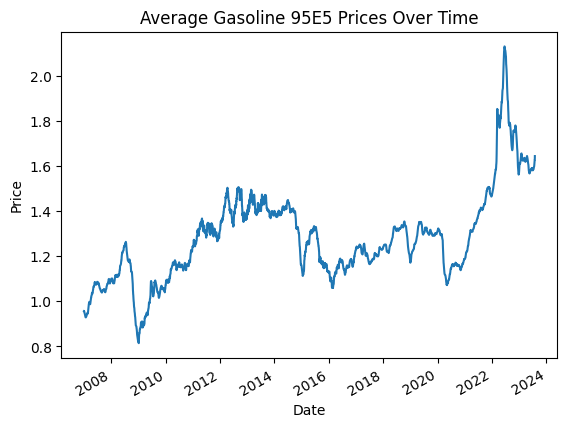

In [7]:
import matplotlib.pyplot as plt

# Example for Gasoline 95E5
data['date'] = pd.to_datetime(data['date'])  # Ensure 'date' is datetime
data.groupby('date')['gasoline_95E5'].mean().plot()
plt.title('Average Gasoline 95E5 Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


In [8]:
# Check unique station names to confirm where "GALP" appears
unique_station_names = data['name'].unique()
print("Unique station names:", unique_station_names)

# Filter the dataset for stations with "GALP" in the name
galp_stations = data[data['name'].str.contains('GALP', case=False, na=False)]

# Check the number of GALP stations
print(f"Number of GALP stations: {galp_stations.shape[0]}")

# Display the first few rows of GALP stations
print(galp_stations.head())



Unique station names: ['ALSA' 'COOP. Nª Sª DE LA ASUNCION DE SONEJA' 'CEPSA' ... 'E.S. SARASA I'
 'E.S. SARASA II' 'BARCELONA M.A.C']
Number of GALP stations: 2940673
    station_id       date gasoline_95E5 gasoline_95E5_premium gasoline_95E10  \
6         7071 2023-07-29   1.784000000                  None           None   
13        3748 2023-07-29   1.689000000                  None           None   
15        1865 2023-07-29   1.589000000           1.639000000           None   
25        7462 2023-07-29   1.724000000                  None           None   
26        3499 2023-07-29   1.724000000                  None           None   

   gasoline_98E5 gasoline_98E10     diesel_A     diesel_B diesel_premium  ...  \
6    1.924000000           None  1.614000000         None    1.704000000  ...   
13   1.829000000           None  1.534000000         None    1.584000000  ...   
15          None           None  1.479000000         None    1.549000000  ...   
25   1.864000000           N

In [9]:
# Display the 'name' column of filtered GALP data
print(galp_stations['name'].unique())


['GALP' 'GALP ENERGIA' 'GALP&GO' 'GALP DISTRIBUCION OIL ESPAÑA, S.A.U.'
 'GALP - AMERICAN PETROL' 'GALP/3CAMINOS-VALENCIA' 'GALP-3 CAMINOS'
 'GALP LA JUNQUERA' 'EESS DE CABANES GALP 40 PIES' 'GALP-3CAMINOS UTIEL'
 'GALP (E.S. ANTUNEZ)' 'GALP ARRIONDAS' 'GALP ENERGIA ESPAÑA, S.A.U.']


In [10]:
galp_stations = data[data['name'].str.contains('GALP', case=True, na=False)]
print(galp_stations['name'].unique())


['GALP' 'GALP ENERGIA' 'GALP&GO' 'GALP DISTRIBUCION OIL ESPAÑA, S.A.U.'
 'GALP - AMERICAN PETROL' 'GALP/3CAMINOS-VALENCIA' 'GALP-3 CAMINOS'
 'GALP LA JUNQUERA' 'EESS DE CABANES GALP 40 PIES' 'GALP-3CAMINOS UTIEL'
 'GALP (E.S. ANTUNEZ)' 'GALP ARRIONDAS' 'GALP ENERGIA ESPAÑA, S.A.U.']


In [11]:
false_positives = galp_stations[~galp_stations['name'].str.match(r'\bGALP\b', case=False)]
print(false_positives)


          station_id       date gasoline_95E5 gasoline_95E5_premium  \
9020           12613 2023-07-29   1.799000000                  None   
17248          12613 2023-07-28   1.729000000                  None   
27404          12613 2023-07-27   1.729000000                  None   
39735          12613 2023-07-26   1.729000000                  None   
50721          12613 2023-07-25   1.729000000                  None   
...              ...        ...           ...                   ...   
35809571       12613 2013-12-09   1.435000000                  None   
35821790       12613 2013-12-08   1.435000000                  None   
35830884       12613 2013-12-07   1.435000000                  None   
35840672       12613 2013-12-06   1.435000000                  None   
35849560       12613 2013-12-05   1.435000000                  None   

         gasoline_95E10 gasoline_98E5 gasoline_98E10     diesel_A  \
9020               None          None           None  1.599000000   
17248    

In [12]:
print(false_positives['name'].unique())


['EESS DE CABANES GALP 40 PIES']


In [13]:
print(galp_stations[['region_name', 'municipality_name', 'schedule']].head())


             region_name municipality_name          schedule
6              Andalucia          Marbella          L-D: 24H
13  Comunidad Valenciana         Elche/Elx  L-D: 06:00-22:00
15              Cataluña          Terrassa          L-D: 24H
25             Andalucia           Sevilla          L-D: 24H
26  Comunidad Valenciana             Nules  L-D: 06:00-22:00


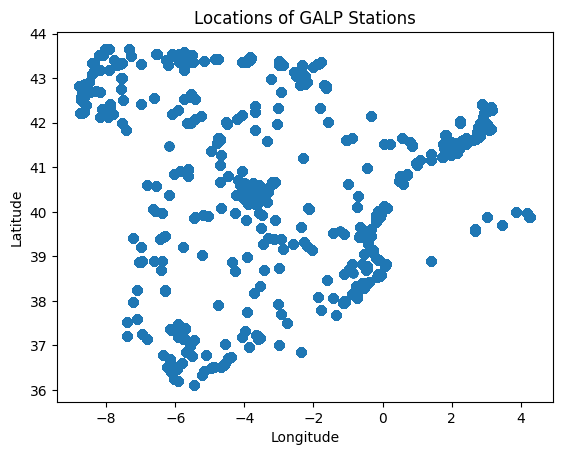

In [14]:
import matplotlib.pyplot as plt

plt.scatter(galp_stations['longitude'], galp_stations['latitude'], alpha=0.5)
plt.title('Locations of GALP Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [15]:
# Filter for Madrid in region_name, municipality_name, or town
madrid_stations = galp_stations[
    (galp_stations['region_name'].str.contains('Madrid', case=False, na=False)) |
    (galp_stations['municipality_name'].str.contains('Madrid', case=False, na=False)) |
    (galp_stations['town'].str.contains('Madrid', case=False, na=False))
]

# Display the first few rows of stations in Madrid or surrounding area
print(madrid_stations[['name', 'town', 'region_name', 'municipality_name', 'longitude', 'latitude']].head())


      name               town region_name  municipality_name  longitude  \
44    GALP          VALDEMORO      Madrid          Valdemoro  -3.692694   
441   GALP              PARLA      Madrid              Parla  -3.763778   
1005  GALP  ALCALA DE HENARES      Madrid  Alcalá de Henares  -3.388028   
1125  GALP            COSLADA      Madrid            Coslada  -3.533444   
1557  GALP           BUTARQUE      Madrid            Leganés  -3.797444   

       latitude  
44    40.185500  
441   40.251194  
1005  40.494167  
1125  40.432944  
1557  40.346278  


In [16]:
# Define bounds for the Madrid Metro Area
latitude_bounds = (39.8, 41.2)  # Latitude range
longitude_bounds = (-4.5, -2.5)  # Longitude range

# Filter stations within the Madrid Metro Area
madrid_metro_stations = galp_stations[
    (galp_stations['latitude'] >= latitude_bounds[0]) &
    (galp_stations['latitude'] <= latitude_bounds[1]) &
    (galp_stations['longitude'] >= longitude_bounds[0]) &
    (galp_stations['longitude'] <= longitude_bounds[1])
]

# Display the first few rows
print(madrid_metro_stations[['name', 'region_name', 'municipality_name', 'longitude', 'latitude']].head())


      name         region_name  municipality_name  longitude   latitude
44    GALP              Madrid          Valdemoro  -3.692694  40.185500
441   GALP              Madrid              Parla  -3.763778  40.251194
705   GALP  Castilla la Mancha          Carranque  -3.886361  40.182056
780   GALP  Castilla la Mancha        Guadalajara  -3.191000  40.634778
1005  GALP              Madrid  Alcalá de Henares  -3.388028  40.494167


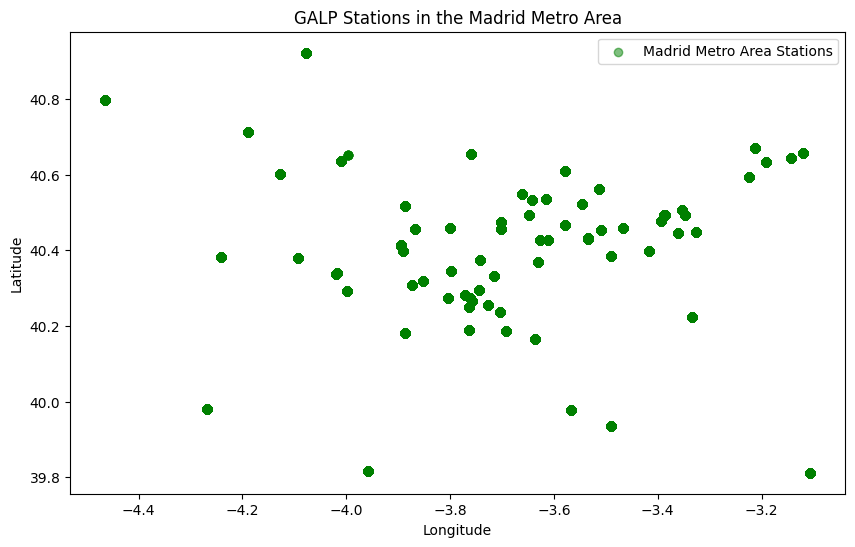

In [17]:
import matplotlib.pyplot as plt

# Plot stations in the Madrid Metro Area
plt.figure(figsize=(10, 6))
plt.scatter(madrid_metro_stations['longitude'], madrid_metro_stations['latitude'], alpha=0.5, color='green', label='Madrid Metro Area Stations')
plt.title('GALP Stations in the Madrid Metro Area')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


In [18]:
# Define updated bounds for the Madrid Metro Area
latitude_bounds = (39.8, 41.2)  # Latitude range
longitude_bounds = (-4.5, -2.5)  # Longitude range



In [19]:
# Filter all stations within the specified bounds
madrid_metro_all_stations = data[
    (data['latitude'] >= latitude_bounds[0]) &
    (data['latitude'] <= latitude_bounds[1]) &
    (data['longitude'] >= longitude_bounds[0]) &
    (data['longitude'] <= longitude_bounds[1])
]

# Display the first few rows
print(madrid_metro_all_stations[['name', 'region_name', 'municipality_name', 'longitude', 'latitude']].head())


           name         region_name    municipality_name  longitude   latitude
37   STORE FUEL              Madrid    Torrejón de Ardoz  -3.461778  40.455806
39    BALLENOIL              Madrid    Daganzo de Arriba  -3.463556  40.541000
44         GALP              Madrid            Valdemoro  -3.692694  40.185500
100      REPSOL  Castilla la Mancha             Illescas  -3.846250  40.126306
109       CEPSA              Madrid  Torrejón de Velasco  -3.725222  40.182444


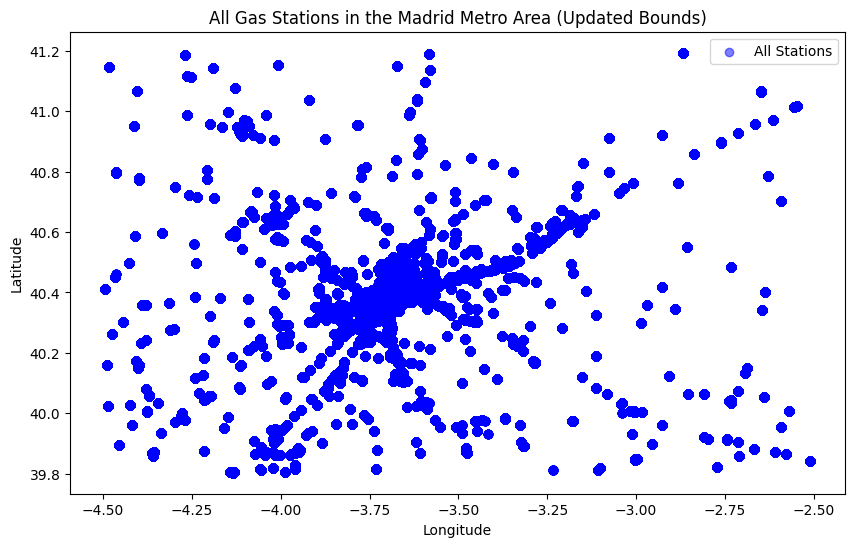

In [20]:


# Plot all stations
plt.figure(figsize=(10, 6))
plt.scatter(
    madrid_metro_all_stations['longitude'],
    madrid_metro_all_stations['latitude'],
    alpha=0.5,
    color='blue',
    label='All Stations'
)

# Add titles and labels
plt.title('All Gas Stations in the Madrid Metro Area (Updated Bounds)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


C:\Users\azmyn\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


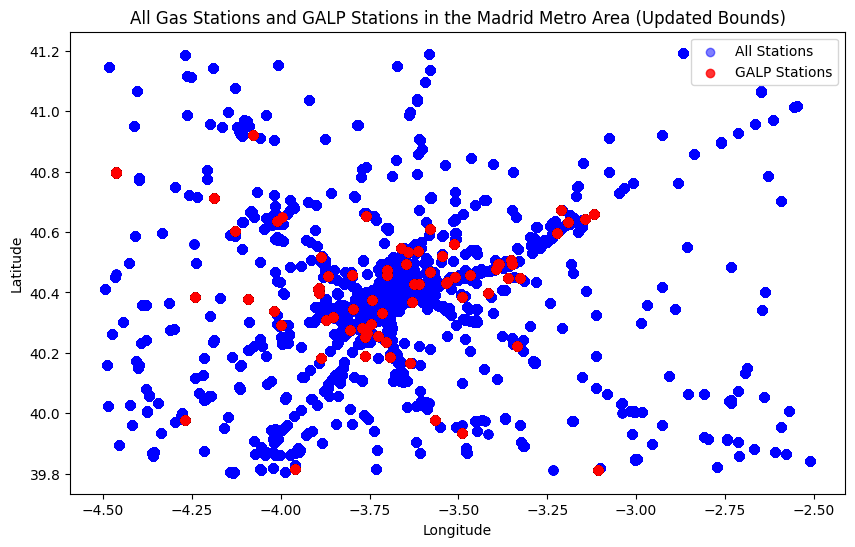

In [21]:
# Filter GALP stations within the specified bounds
galp_madrid_metro_stations = galp_stations[
    (galp_stations['latitude'] >= latitude_bounds[0]) &
    (galp_stations['latitude'] <= latitude_bounds[1]) &
    (galp_stations['longitude'] >= longitude_bounds[0]) &
    (galp_stations['longitude'] <= longitude_bounds[1])
]

# Plot all stations and overlay GALP stations
plt.figure(figsize=(10, 6))
plt.scatter(
    madrid_metro_all_stations['longitude'],
    madrid_metro_all_stations['latitude'],
    alpha=0.5,
    color='blue',
    label='All Stations'
)
plt.scatter(
    galp_madrid_metro_stations['longitude'],
    galp_madrid_metro_stations['latitude'],
    alpha=0.8,
    color='red',
    label='GALP Stations'
)

# Add titles and labels
plt.title('All Gas Stations and GALP Stations in the Madrid Metro Area (Updated Bounds)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


In [22]:
!python -m pip install plotly
!python -m pip install --upgrade nbformat

In [23]:
print(madrid_stations['name'].unique())


['GALP' 'GALP&GO']


In [24]:
# Define a mapping of keywords to major brands
brand_mapping = {
    "GALP": "GALP",
    "SHELL": "SHELL",
    "REPSOL": "REPSOL",
    "BP": "BP",
    "CEPSA": "CEPSA",
    "Q8": "Q8",
    "TOTAL": "TOTAL",
    "AVIA": "AVIA",
    # Add more as needed
}

# Function to map names to brands
def map_brand(name):
    for keyword, brand in brand_mapping.items():
        if keyword in name.upper():  # Convert to uppercase for case-insensitive matching
            return brand
    return "OTHER"  # Default category for unrecognized stations



In [25]:
# Use the original dataset (e.g., 'data') for all stations
all_stations = data.copy()

# Apply the brand mapping to the unfiltered dataset
all_stations['brand'] = all_stations['name'].apply(map_brand)

# Display unique brands and first few rows
print(all_stations['brand'].unique())
print(all_stations[['name', 'brand']].head())



['OTHER' 'CEPSA' 'GALP' 'SHELL' 'REPSOL' 'BP' 'AVIA' 'Q8' 'TOTAL']
                                   name  brand
0                                  ALSA  OTHER
1  COOP. Nª Sª DE LA ASUNCION DE SONEJA  OTHER
2                                 CEPSA  CEPSA
3     ESTACION DE SERVICIO VICASOL S.L.  OTHER
4                                  AGLA  OTHER


In [26]:
# Filter for stations in Madrid area
madrid_stations_all = all_stations[
    (all_stations['region_name'].str.contains('Madrid', case=False, na=False)) |
    (all_stations['municipality_name'].str.contains('Madrid', case=False, na=False)) |
    (all_stations['town'].str.contains('Madrid', case=False, na=False))
]

# Count the number of stations by brand
brand_counts_madrid = madrid_stations_all['brand'].value_counts()
print(brand_counts_madrid)


brand
REPSOL    1348806
CEPSA      800360
OTHER      692311
BP         436620
GALP       288843
SHELL      287151
AVIA        22384
Q8          20057
Name: count, dtype: int64


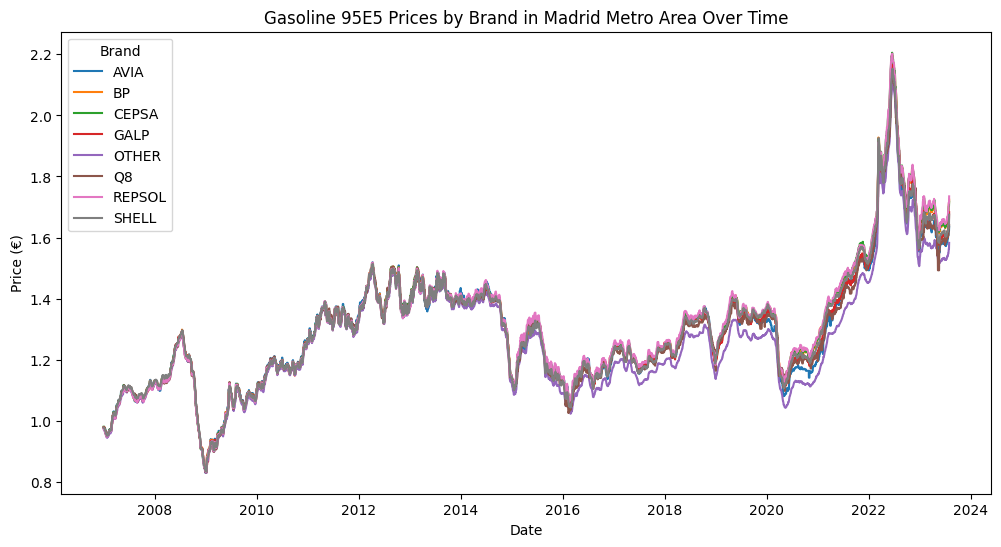

In [27]:

# Group by date and brand for average price trends
price_trends = madrid_stations_all.groupby(['date', 'brand'])['gasoline_95E5'].mean().reset_index()

# Plot price trends for each brand
plt.figure(figsize=(12, 6))
for brand in price_trends['brand'].unique():
    brand_data = price_trends[price_trends['brand'] == brand]
    plt.plot(brand_data['date'], brand_data['gasoline_95E5'], label=brand)

plt.title('Gasoline 95E5 Prices by Brand in Madrid Metro Area Over Time')
plt.xlabel('Date')
plt.ylabel('Price (€)')
plt.legend(title='Brand')
plt.show()


In [28]:
from datetime import datetime

# Filter for data from the last year (adjust as needed)
recent_date = madrid_stations_all['date'].max()
one_year_ago = recent_date - pd.DateOffset(years=1)
recent_data = madrid_stations_all[madrid_stations_all['date'] >= one_year_ago]


In [29]:
# Aggregate by month-year and brand
recent_data['month_year'] = recent_data['date'].dt.to_period('M')
avg_price_by_month = recent_data.groupby(['month_year', 'brand'])['gasoline_95E5'].mean().reset_index()


C:\Users\azmyn\AppData\Local\Temp\ipykernel_28496\237773634.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_data['month_year'] = recent_data['date'].dt.to_period('M')


C:\Users\azmyn\AppData\Local\Temp\ipykernel_28496\3714879577.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=recent_data, x='brand', y='gasoline_95E5', palette='coolwarm')


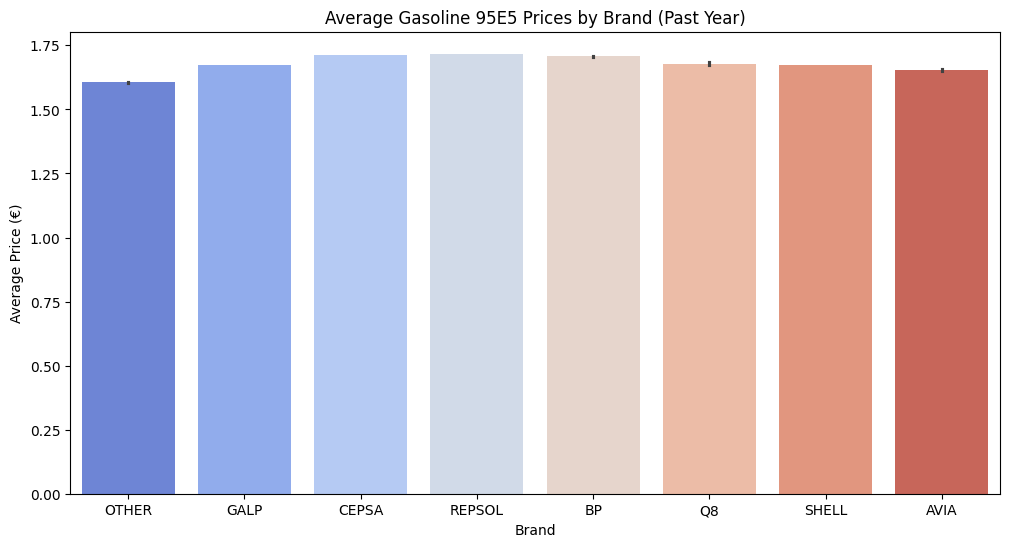

In [30]:
import seaborn as sns
# Plot recent averages by brand
plt.figure(figsize=(12, 6))
sns.barplot(data=recent_data, x='brand', y='gasoline_95E5', palette='coolwarm')
plt.title('Average Gasoline 95E5 Prices by Brand (Past Year)')
plt.xlabel('Brand')
plt.ylabel('Average Price (€)')
plt.show()


In [31]:
print(madrid_stations_all['gasoline_95E5'].dtype)


object


In [32]:
!python -m pip install statsmodels


In [33]:
shell_data = madrid_stations_all[madrid_stations_all['brand'] == 'SHELL']


In [34]:
print(shell_data['gasoline_95E5'].unique())  # Check for unexpected or non-numeric values


[Decimal('1.489000000') Decimal('1.709000000') Decimal('1.744000000')
 Decimal('1.704000000') Decimal('1.724000000') Decimal('1.689000000')
 Decimal('1.684000000') Decimal('1.549000000') Decimal('1.649000000')
 Decimal('1.714000000') Decimal('1.669000000') Decimal('1.729000000')
 Decimal('1.749000000') Decimal('1.609000000') Decimal('1.694000000')
 Decimal('1.659000000') Decimal('1.599000000') Decimal('1.639000000')
 Decimal('1.619000000') Decimal('1.699000000') Decimal('1.739000000')
 Decimal('1.719000000') Decimal('1.679000000') Decimal('1.519000000')
 Decimal('1.664000000') Decimal('1.644000000') Decimal('1.569000000')
 Decimal('1.469000000') Decimal('1.589000000') Decimal('1.629000000')
 Decimal('1.594000000') Decimal('1.529000000') Decimal('1.674000000')
 Decimal('1.499000000') Decimal('1.579000000') Decimal('1.654000000')
 Decimal('1.459000000') Decimal('1.564000000') Decimal('1.624000000')
 Decimal('1.574000000') Decimal('1.479000000') Decimal('1.634000000')
 Decimal('1.55400000

In [35]:
shell_data['gasoline_95E5'] = pd.to_numeric(shell_data['gasoline_95E5'], errors='coerce')
shell_data['gasoline_95E5'] = shell_data['gasoline_95E5'].fillna(shell_data['gasoline_95E5'].mean())



C:\Users\azmyn\AppData\Local\Temp\ipykernel_28496\3398852744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shell_data['gasoline_95E5'] = pd.to_numeric(shell_data['gasoline_95E5'], errors='coerce')
C:\Users\azmyn\AppData\Local\Temp\ipykernel_28496\3398852744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shell_data['gasoline_95E5'] = shell_data['gasoline_95E5'].fillna(shell_data['gasoline_95E5'].mean())


In [36]:
print(shell_data['gasoline_95E5'].dtype)  # Should show 'float64' or 'int64'


float64


In [37]:
shell_data = shell_data.sort_values('date')


In [38]:
import numpy as np
shell_data['gasoline_95E5'] = pd.to_numeric(shell_data['gasoline_95E5'], errors='coerce')
shell_data['gasoline_95E5'] = shell_data['gasoline_95E5'].fillna(shell_data['gasoline_95E5'].mean())
gas_prices = np.array(shell_data['gasoline_95E5'])



In [39]:
shell_data = shell_data.sort_values('date')
print(type(gas_prices))  # Should be <class 'numpy.ndarray'>
print(gas_prices.dtype)  # Should be 'float64'


<class 'numpy.ndarray'>
float64


In [40]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(gas_prices, seasonal='add', seasonal_periods=12)
fit = model.fit()
forecast = fit.forecast(6)
print("Forecasted Prices:", forecast)




Forecasted Prices: [1.66229826 1.66203835 1.66222006 1.66211011 1.66255199 1.66238332]


In [41]:
print(madrid_stations_all.columns)


Index(['station_id', 'date', 'gasoline_95E5', 'gasoline_95E5_premium',
       'gasoline_95E10', 'gasoline_98E5', 'gasoline_98E10', 'diesel_A',
       'diesel_B', 'diesel_premium', 'bioetanol', 'biodiesel', 'lpg', 'cng',
       'lng', 'hydrogen', 'name', 'address', 'town', 'zip_code', 'longitude',
       'latitude', 'road_side', 'restriction', 'sender', 'schedule',
       'region_id', 'region_name', 'province_id', 'province_name',
       'municipality_id', 'municipality_name', 'brand'],
      dtype='object')


In [42]:
brand_data['gasoline_95E5'] = pd.to_numeric(brand_data['gasoline_95E5'], errors='coerce')
print(brand_data['gasoline_95E5'].dtype)  # Confirm the type is now float64
print(brand_data['gasoline_95E5'].isnull().sum())  # Check for any NaNs after coercion


float64
0


C:\Users\azmyn\AppData\Local\Temp\ipykernel_28496\4233722143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_data['gasoline_95E5'] = pd.to_numeric(brand_data['gasoline_95E5'], errors='coerce')


In [43]:
print(brand_data['gasoline_95E5'].dtype)  # Should be float64
print(brand_data['gasoline_95E5'].isnull().sum())  # Should be 0


float64
0


In [44]:
# Select one GALP and one SHELL station with sufficient data
galp_station = madrid_stations_all[(madrid_stations_all['brand'] == 'GALP')].groupby('name').filter(lambda x: len(x) > 24)
shell_station = madrid_stations_all[(madrid_stations_all['brand'] == 'SHELL')].groupby('name').filter(lambda x: len(x) > 24)

# Check records
print("GALP station records:", len(galp_station))
print("SHELL station records:", len(shell_station))


GALP station records: 288843
SHELL station records: 287151


In [45]:
# Filter GALP and SHELL stations within a reasonable geographic area
filtered_galp = madrid_stations_all[
    (madrid_stations_all['brand'] == 'GALP') &
    (madrid_stations_all['latitude'] >= 40.4) & (madrid_stations_all['latitude'] <= 40.5) &
    (madrid_stations_all['longitude'] >= -3.8) & (madrid_stations_all['longitude'] <= -3.7)
]

filtered_shell = madrid_stations_all[
    (madrid_stations_all['brand'] == 'SHELL') &
    (madrid_stations_all['latitude'] >= 40.4) & (madrid_stations_all['latitude'] <= 40.5) &
    (madrid_stations_all['longitude'] >= -3.8) & (madrid_stations_all['longitude'] <= -3.7)
]

# Select one GALP and one SHELL station
galp_station = filtered_galp.iloc[0]
shell_station = filtered_shell.iloc[0]

# Print the selected stations
print("Selected GALP station:")
print(galp_station[['name', 'latitude', 'longitude']])

print("\nSelected SHELL station:")
print(shell_station[['name', 'latitude', 'longitude']])


Selected GALP station:
name              GALP
latitude     40.473722
longitude    -3.701361
Name: 4527, dtype: object

Selected SHELL station:
name          SHELL
latitude      40.43
longitude   -3.7085
Name: 4496, dtype: object


In [46]:
# Filter historical data for the selected stations
galp_prices = madrid_stations_all[
    (madrid_stations_all['brand'] == 'GALP') &
    (madrid_stations_all['latitude'] == galp_station['latitude']) &
    (madrid_stations_all['longitude'] == galp_station['longitude'])
]

shell_prices = madrid_stations_all[
    (madrid_stations_all['brand'] == 'SHELL') &
    (madrid_stations_all['latitude'] == shell_station['latitude']) &
    (madrid_stations_all['longitude'] == shell_station['longitude'])
]


C:\Users\azmyn\AppData\Local\Temp\ipykernel_28496\503330312.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  galp_prices['date'] = pd.to_datetime(galp_prices['date'])
C:\Users\azmyn\AppData\Local\Temp\ipykernel_28496\503330312.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shell_prices['date'] = pd.to_datetime(shell_prices['date'])


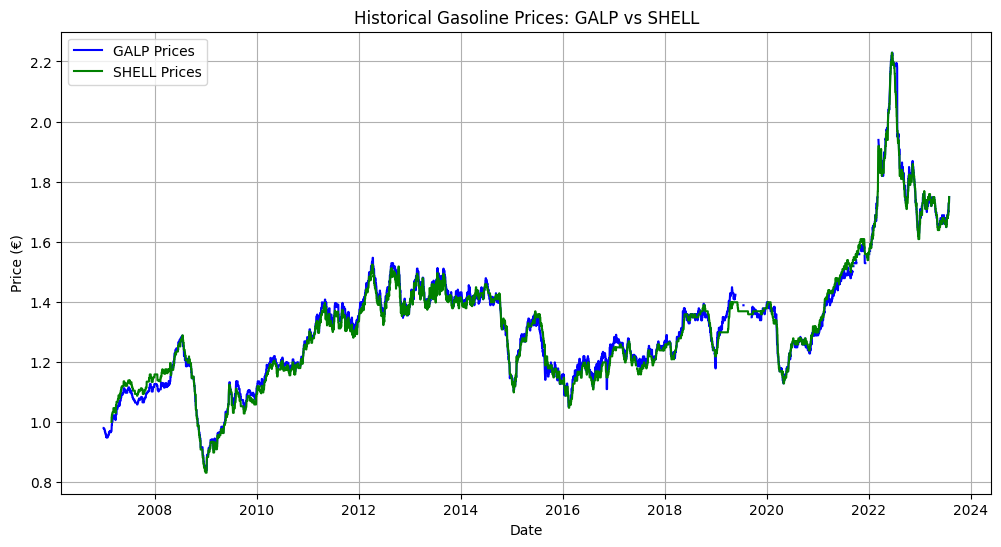

In [47]:
import matplotlib.pyplot as plt

# Convert dates to datetime format
galp_prices['date'] = pd.to_datetime(galp_prices['date'])
shell_prices['date'] = pd.to_datetime(shell_prices['date'])

# Plot the price trends
plt.figure(figsize=(12, 6))
plt.plot(galp_prices['date'], galp_prices['gasoline_95E5'], label='GALP Prices', color='blue')
plt.plot(shell_prices['date'], shell_prices['gasoline_95E5'], label='SHELL Prices', color='green')

# Add labels and legend
plt.title("Historical Gasoline Prices: GALP vs SHELL")
plt.xlabel("Date")
plt.ylabel("Price (€)")
plt.legend()
plt.grid(True)
plt.show()


GALP Station Records: 6034
SHELL Station Records: 5984


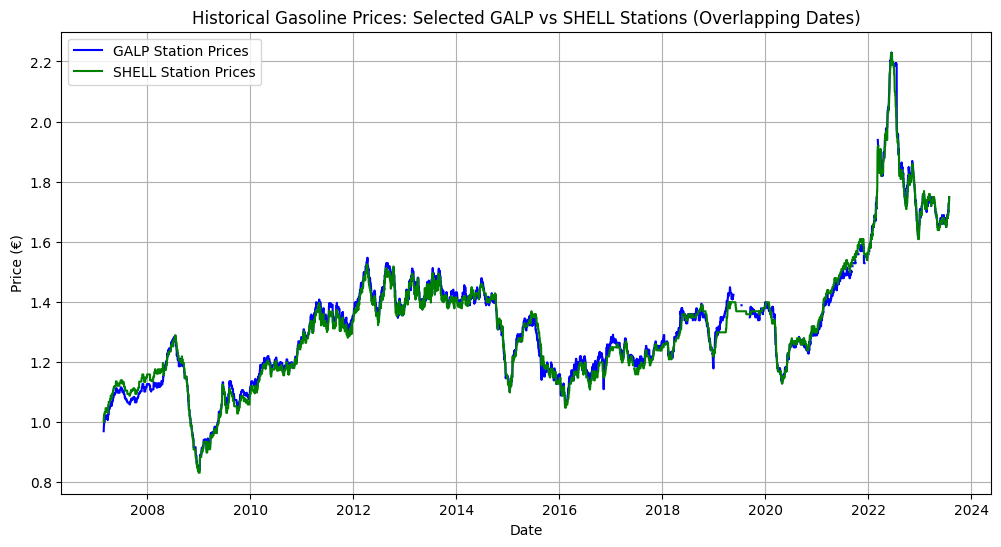

In [48]:
# Check data availability for both stations
print("GALP Station Records:", len(galp_prices))
print("SHELL Station Records:", len(shell_prices))

# Find overlapping date range
common_dates = set(galp_prices['date']).intersection(set(shell_prices['date']))
if len(common_dates) == 0:
    print("No overlapping dates between GALP and SHELL stations.")
else:
    # Filter data to overlapping dates
    galp_prices_filtered = galp_prices[galp_prices['date'].isin(common_dates)]
    shell_prices_filtered = shell_prices[shell_prices['date'].isin(common_dates)]

    # Plot the filtered data
    plt.figure(figsize=(12, 6))
    plt.plot(galp_prices_filtered['date'], galp_prices_filtered['gasoline_95E5'], label='GALP Station Prices', color='blue')
    plt.plot(shell_prices_filtered['date'], shell_prices_filtered['gasoline_95E5'], label='SHELL Station Prices', color='green')

    # Add labels, legend, and grid
    plt.title("Historical Gasoline Prices: Selected GALP vs SHELL Stations (Overlapping Dates)")
    plt.xlabel("Date")
    plt.ylabel("Price (€)")
    plt.legend()
    plt.grid(True)
    plt.show()




In [49]:
# Filter for stations with sufficient records
galp_station_data = madrid_stations_all[
    (madrid_stations_all['brand'] == 'GALP') & (madrid_stations_all['name'] == 'Selected GALP Station')
]
shell_station_data = madrid_stations_all[
    (madrid_stations_all['brand'] == 'SHELL') & (madrid_stations_all['name'] == 'Selected SHELL Station')
]

print("GALP Records:", len(galp_station_data))
print("SHELL Records:", len(shell_station_data))


GALP Records: 0
SHELL Records: 0


In [50]:
galp_station = madrid_stations_all[
    (madrid_stations_all['brand'] == 'GALP')
].groupby('name').filter(lambda x: len(x) > 24)

shell_station = madrid_stations_all[
    (madrid_stations_all['brand'] == 'SHELL')
].groupby('name').filter(lambda x: len(x) > 24)


In [51]:
print(galp_station['name'].unique())
print(shell_station['name'].unique())


['GALP' 'GALP&GO']
['SHELL' 'SHELL ATALAYUELA 365']


In [52]:
selected_galp_station = galp_station[galp_station['name'] == 'Specific GALP Station']
selected_shell_station = shell_station[shell_station['name'] == 'Specific SHELL Station']


0
0


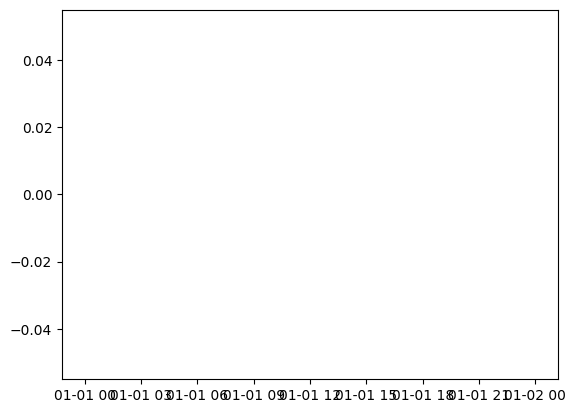

In [53]:
plt.plot(selected_galp_station['date'], selected_galp_station['gasoline_95E5'], label="GALP Prices")
print(selected_galp_station['gasoline_95E5'].isnull().sum())
print(selected_shell_station['gasoline_95E5'].isnull().sum())



In [54]:
print(selected_galp_station.shape)
print(selected_shell_station.shape)


(0, 33)
(0, 33)


In [55]:
!python -m pip install geopy


Selected GALP Station: GALP
Selected SHELL Station: SHELL


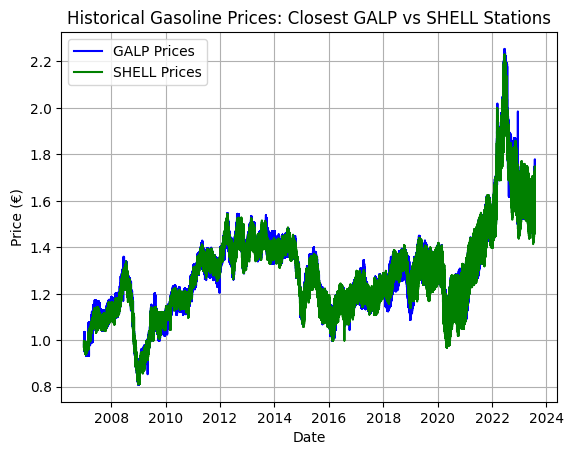

In [56]:
from geopy.distance import geodesic

# Step 1: Filter for Madrid stations
madrid_galp = madrid_stations_all[madrid_stations_all['brand'] == 'GALP']
madrid_shell = madrid_stations_all[madrid_stations_all['brand'] == 'SHELL']

# Step 2: Group by station name and count records
galp_station_counts = madrid_galp.groupby('name').size().reset_index(name='count')
shell_station_counts = madrid_shell.groupby('name').size().reset_index(name='count')

# Step 3: Merge station info with counts
galp_stations_with_data = pd.merge(madrid_galp[['name', 'latitude', 'longitude']].drop_duplicates(), galp_station_counts, on='name')
shell_stations_with_data = pd.merge(madrid_shell[['name', 'latitude', 'longitude']].drop_duplicates(), shell_station_counts, on='name')

# Step 4: Identify closest stations
closest_stations = []
for _, galp_row in galp_stations_with_data.iterrows():
    galp_coords = (galp_row['latitude'], galp_row['longitude'])
    for _, shell_row in shell_stations_with_data.iterrows():
        shell_coords = (shell_row['latitude'], shell_row['longitude'])
        distance = geodesic(galp_coords, shell_coords).kilometers
        closest_stations.append({
            'galp_name': galp_row['name'],
            'shell_name': shell_row['name'],
            'galp_lat': galp_row['latitude'],
            'galp_lon': galp_row['longitude'],
            'shell_lat': shell_row['latitude'],
            'shell_lon': shell_row['longitude'],
            'distance': distance,
            'galp_count': galp_row['count'],
            'shell_count': shell_row['count']
        })

# Convert to DataFrame
closest_stations_df = pd.DataFrame(closest_stations)

# Step 5: Select the closest pair with the most data
selected_pair = closest_stations_df.sort_values(by=['distance', 'galp_count', 'shell_count']).iloc[0]
print("Selected GALP Station:", selected_pair['galp_name'])
print("Selected SHELL Station:", selected_pair['shell_name'])

# Step 6: Filter data for the selected stations
selected_galp_station = madrid_galp[madrid_galp['name'] == selected_pair['galp_name']]
selected_shell_station = madrid_shell[madrid_shell['name'] == selected_pair['shell_name']]

# Step 7: Plot the historical prices
import matplotlib.pyplot as plt

plt.plot(selected_galp_station['date'], selected_galp_station['gasoline_95E5'], label="GALP Prices", color="blue")
plt.plot(selected_shell_station['date'], selected_shell_station['gasoline_95E5'], label="SHELL Prices", color="green")
plt.legend()
plt.title("Historical Gasoline Prices: Closest GALP vs SHELL Stations")
plt.xlabel("Date")
plt.ylabel("Price (€)")
plt.grid(True)
plt.show()


In [57]:
# Pivot the data to create a table where each column is a brand and rows are dates
price_pivot = price_trends.pivot(index='date', columns='brand', values='gasoline_95E5')

# Calculate price differences between GALP and competitors
# Step 1: Calculate Price Differences
# Assuming price_pivot contains all brands
price_pivot['GALP_vs_SHELL'] = price_pivot['GALP'] - price_pivot['SHELL']
price_pivot['GALP_vs_REPSOL'] = price_pivot['GALP'] - price_pivot['REPSOL']
price_pivot['GALP_vs_BP'] = price_pivot['GALP'] - price_pivot['BP']
price_pivot['GALP_vs_CEPSA'] = price_pivot['GALP'] - price_pivot['CEPSA']
price_pivot['GALP_vs_AVIA'] = price_pivot['GALP'] - price_pivot['AVIA']
price_pivot['GALP_vs_Q8'] = price_pivot['GALP'] - price_pivot['Q8']

# Reset the index for plotting
price_differences = price_pivot.reset_index()

# Display the resulting DataFrame
price_differences.head()

# Reset the index to prepare for plotting
price_differences = price_pivot.reset_index()

# Display the resulting DataFrame
price_differences.head()

brand,date,AVIA,BP,CEPSA,GALP,OTHER,Q8,REPSOL,SHELL,GALP_vs_SHELL,GALP_vs_REPSOL,GALP_vs_BP,GALP_vs_CEPSA,GALP_vs_AVIA,GALP_vs_Q8
0,2007-01-01,0.978,0.977367,0.980938,0.979897,0.973383,0.977,0.975685,0.978714,0.001182,0.004212,0.002529,-0.001042,0.001897,0.002897
1,2007-01-02,0.978,0.977286,0.981137,0.98031,0.973426,0.977,0.975342,0.978048,0.002263,0.004969,0.003025,-0.000826,0.00231,0.00331
2,2007-01-03,0.978,0.977375,0.981086,0.978036,0.973973,0.977,0.976024,0.97805,-0.000014,0.002012,0.000661,-0.00305,0.000036,0.001036
3,2007-01-04,0.978,0.977375,0.981086,0.978036,0.97273,0.977,0.975821,0.97755,0.000486,0.002214,0.000661,-0.00305,0.000036,0.001036
4,2007-01-05,0.978,0.977292,0.981204,0.979357,0.971649,0.977,0.975452,0.97675,0.002607,0.003905,0.002065,-0.001847,0.001357,0.002357


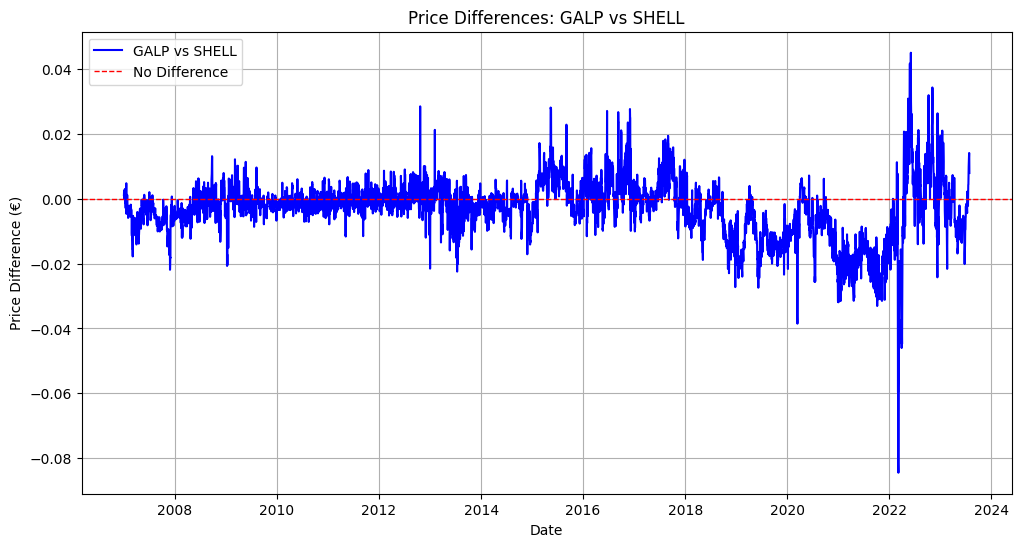

In [58]:
# Plot GALP vs SHELL
plt.figure(figsize=(12, 6))
plt.plot(price_differences['date'], price_differences['GALP_vs_SHELL'], label="GALP vs SHELL", color="blue")
plt.axhline(y=0, color='red', linestyle='--', linewidth=1, label="No Difference")
plt.title("Price Differences: GALP vs SHELL")
plt.xlabel("Date")
plt.ylabel("Price Difference (€)")
plt.legend()
plt.grid(True)
plt.show()

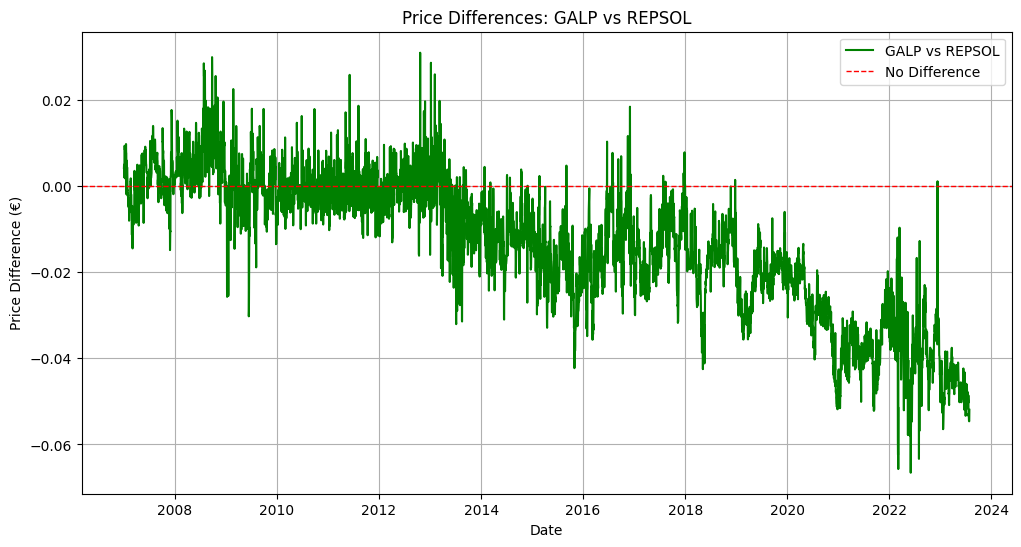

In [59]:
# Plot GALP vs REPSOL
plt.figure(figsize=(12, 6))
plt.plot(price_differences['date'], price_differences['GALP_vs_REPSOL'], label="GALP vs REPSOL", color="green")
plt.axhline(y=0, color='red', linestyle='--', linewidth=1, label="No Difference")
plt.title("Price Differences: GALP vs REPSOL")
plt.xlabel("Date")
plt.ylabel("Price Difference (€)")
plt.legend()
plt.grid(True)
plt.show()


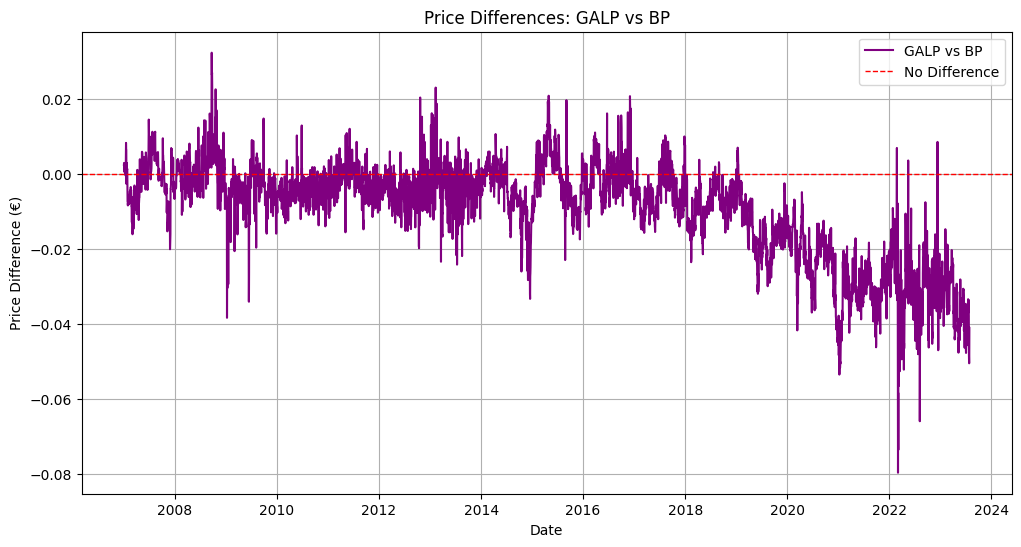

In [60]:
# Plot GALP vs BP
plt.figure(figsize=(12, 6))
plt.plot(price_differences['date'], price_differences['GALP_vs_BP'], label="GALP vs BP", color="purple")
plt.axhline(y=0, color='red', linestyle='--', linewidth=1, label="No Difference")
plt.title("Price Differences: GALP vs BP")
plt.xlabel("Date")
plt.ylabel("Price Difference (€)")
plt.legend()
plt.grid(True)
plt.show()


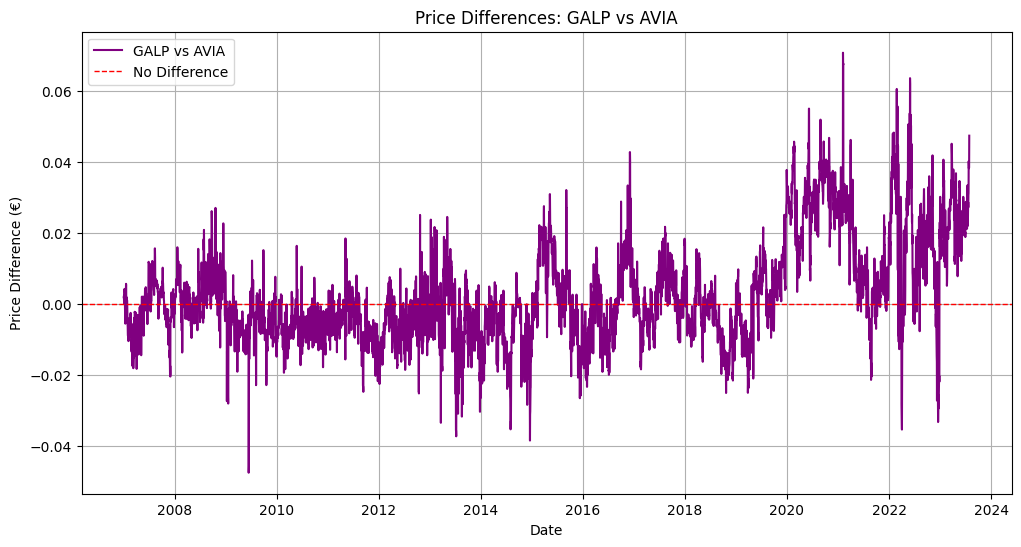

In [61]:
# Plot GALP vs AVIA
plt.figure(figsize=(12, 6))
plt.plot(price_differences['date'], price_differences['GALP'] - price_differences['AVIA'], label="GALP vs AVIA", color="purple")
plt.axhline(y=0, color='red', linestyle='--', linewidth=1, label="No Difference")
plt.title("Price Differences: GALP vs AVIA")
plt.xlabel("Date")
plt.ylabel("Price Difference (€)")
plt.legend()
plt.grid(True)
plt.show()


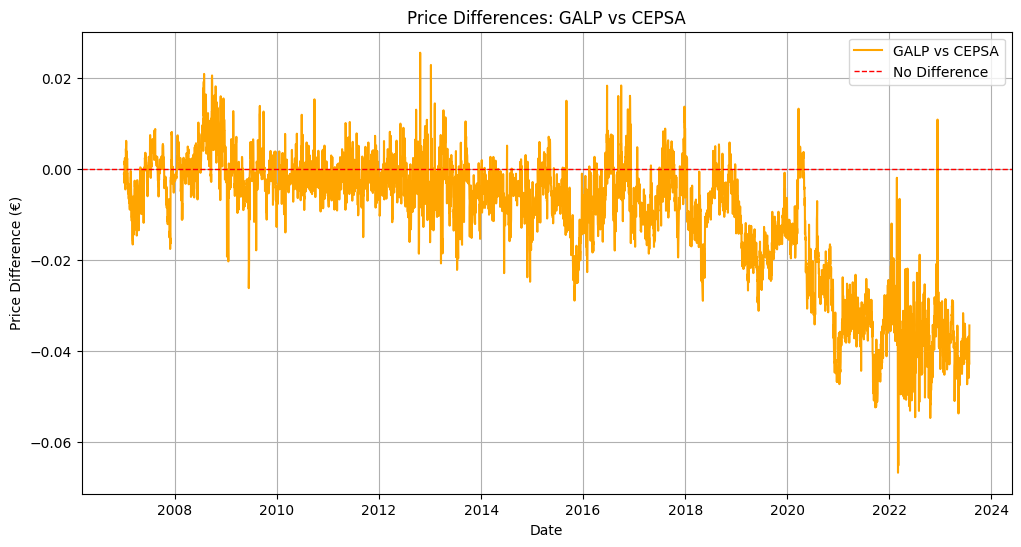

In [62]:
# Plot GALP vs CEPSA
plt.figure(figsize=(12, 6))
plt.plot(price_differences['date'], price_differences['GALP'] - price_differences['CEPSA'], label="GALP vs CEPSA", color="orange")
plt.axhline(y=0, color='red', linestyle='--', linewidth=1, label="No Difference")
plt.title("Price Differences: GALP vs CEPSA")
plt.xlabel("Date")
plt.ylabel("Price Difference (€)")
plt.legend()
plt.grid(True)
plt.show()


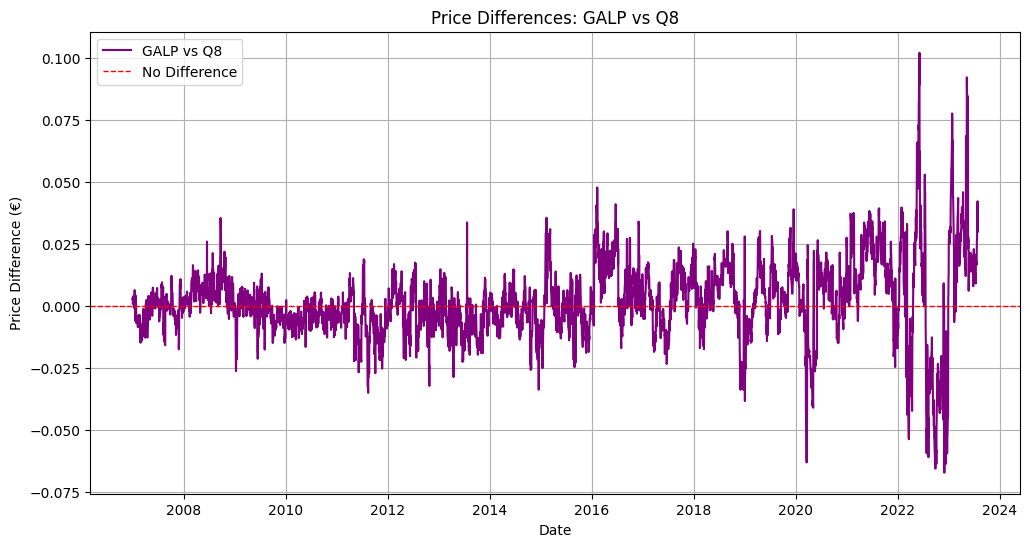

In [63]:
# Plot GALP vs Q8
plt.figure(figsize=(12, 6))
plt.plot(price_differences['date'], price_differences['GALP'] - price_differences['Q8'], label="GALP vs Q8", color="purple")
plt.axhline(y=0, color='red', linestyle='--', linewidth=1, label="No Difference")
plt.title("Price Differences: GALP vs Q8")
plt.xlabel("Date")
plt.ylabel("Price Difference (€)")
plt.legend()
plt.grid(True)
plt.show()



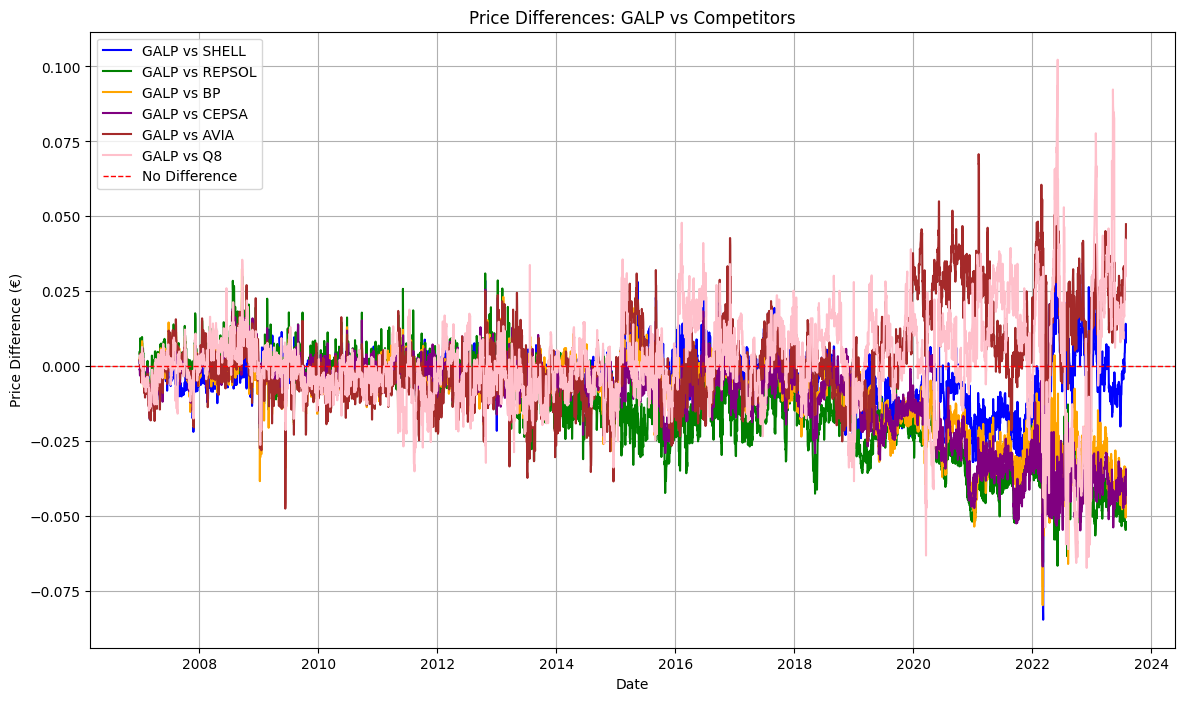

In [64]:
# Plot all GALP vs other brands in a single plot
plt.figure(figsize=(14, 8))

# Plot GALP vs each competitor
plt.plot(price_differences['date'], price_differences['GALP'] - price_differences['SHELL'], label="GALP vs SHELL", color="blue")
plt.plot(price_differences['date'], price_differences['GALP'] - price_differences['REPSOL'], label="GALP vs REPSOL", color="green")
plt.plot(price_differences['date'], price_differences['GALP'] - price_differences['BP'], label="GALP vs BP", color="orange")
plt.plot(price_differences['date'], price_differences['GALP'] - price_differences['CEPSA'], label="GALP vs CEPSA", color="purple")
plt.plot(price_differences['date'], price_differences['GALP'] - price_differences['AVIA'], label="GALP vs AVIA", color="brown")
plt.plot(price_differences['date'], price_differences['GALP'] - price_differences['Q8'], label="GALP vs Q8", color="pink")

# Add horizontal line at 0 for reference
plt.axhline(y=0, color='red', linestyle='--', linewidth=1, label="No Difference")

# Add title, labels, legend, and grid
plt.title("Price Differences: GALP vs Competitors")
plt.xlabel("Date")
plt.ylabel("Price Difference (€)")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [65]:
# Step 1: Mean and Standard Deviation Analysis
stats = {}
for column in ['GALP_vs_SHELL', 'GALP_vs_REPSOL', 'GALP_vs_BP', 'GALP_vs_CEPSA', 'GALP_vs_AVIA', 'GALP_vs_Q8']:
    stats[column] = {
        'mean': price_differences[column].mean(),
        'std_dev': price_differences[column].std()
    }

# Convert stats dictionary to a DataFrame for better visualization
import pandas as pd
stats_df = pd.DataFrame(stats).T
stats_df.columns = ['Mean', 'Standard Deviation']

# Display the stats DataFrame in your notebook
print(stats_df)



                    Mean  Standard Deviation
GALP_vs_SHELL  -0.003099            0.009024
GALP_vs_REPSOL -0.013697            0.016021
GALP_vs_BP     -0.009297            0.012920
GALP_vs_CEPSA  -0.010589            0.014008
GALP_vs_AVIA    0.002433            0.014205
GALP_vs_Q8      0.001690            0.015695


The statistical analysis of price differences between GALP and its competitors reveals key insights into their pricing strategies. The mean price differences indicate whether GALP's prices are generally higher or lower compared to each competitor over time, with negative means suggesting that GALP tends to price lower than competitors on average. The standard deviation, on the other hand, measures the variability in these price differences, providing insights into the stability of GALP's pricing strategy relative to competitors. A low standard deviation reflects consistent pricing, while a high standard deviation indicates fluctuations. These metrics allow for deeper understanding of market dynamics and competitive behavior, which are essential for predicting competitor actions and optimizing pricing strategies.

In [66]:
correlations = price_differences.corr()
print(correlations)


brand               date      AVIA        BP     CEPSA      GALP     OTHER  \
brand                                                                        
date            1.000000  0.578510  0.627299  0.629741  0.603309  0.505673   
AVIA            0.578510  1.000000  0.995287  0.994973  0.997563  0.994600   
BP              0.627299  0.995287  1.000000  0.999552  0.998547  0.986222   
CEPSA           0.629741  0.994973  0.999552  1.000000  0.998524  0.985481   
GALP            0.603309  0.997563  0.998547  0.998524  1.000000  0.991361   
OTHER           0.505673  0.994600  0.986222  0.985481  0.991361  1.000000   
Q8              0.589880  0.996105  0.995339  0.994898  0.996908  0.992580   
REPSOL          0.643358  0.993870  0.998945  0.999433  0.997879  0.982899   
SHELL           0.612602  0.996708  0.998892  0.998733  0.998983  0.989091   
GALP_vs_SHELL  -0.228703 -0.018532 -0.045172 -0.042144 -0.015019  0.013079   
GALP_vs_REPSOL -0.858106 -0.508261 -0.562096 -0.568732 -0.530086

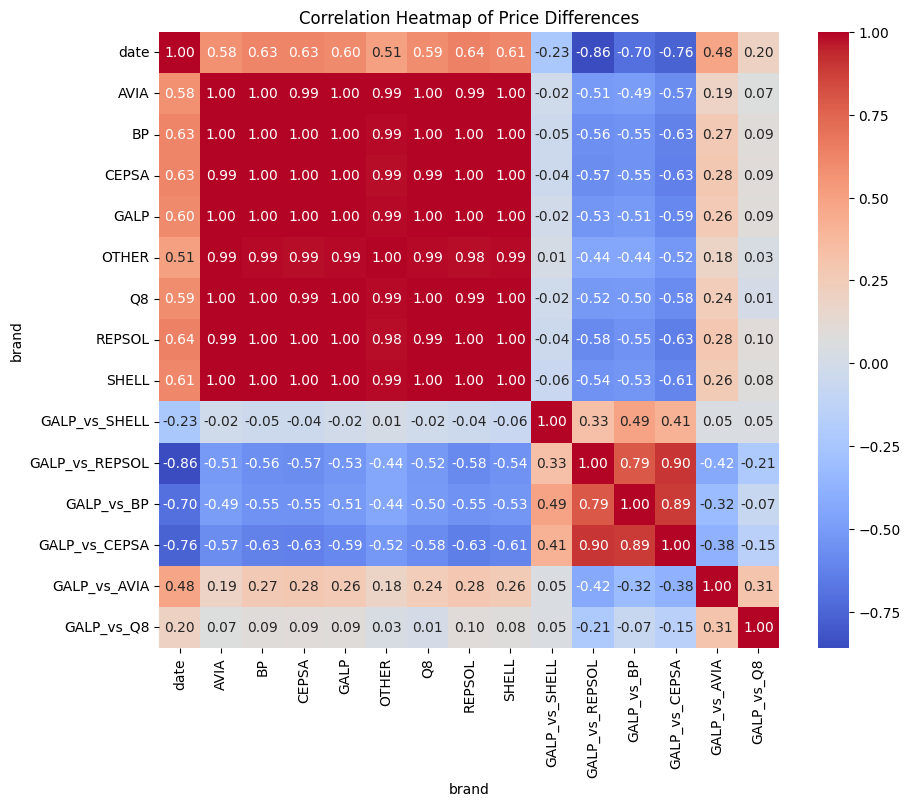

In [67]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Price Differences")
plt.show()

This heatmap reveals how GALP aligns or diverges its pricing strategy compared to its competitors. The strong correlations between competitors like BP, SHELL, and REPSOL suggest a market-driven dynamic where pricing strategies are tightly coupled. In contrast, negative correlations with GALP’s pricing differences highlight the unique positioning of GALP's strategy against some brands (e.g., REPSOL) while maintaining closer alignment with others (e.g., SHELL).

This analysis can guide GALP in identifying key competitors whose pricing moves have the most impact on its market positioning, allowing better strategic alignment or differentiation.

In [ ]:
'''
# Plot yearly mean price differences for GALP vs competitors only
columns_to_plot = ['GALP_vs_SHELL', 'GALP_vs_REPSOL', 'GALP_vs_BP', 'GALP_vs_CEPSA', 'GALP_vs_AVIA', 'GALP_vs_Q8']

plt.figure(figsize=(12, 6))
for column in columns_to_plot:
    plt.plot(yearly_stats.index, yearly_stats[column], label=column)
plt.title("Yearly Mean Price Differences: GALP vs Competitors")
plt.xlabel("Year")
plt.ylabel("Mean Price Difference (€)")
plt.legend(title="Competitor Comparisons")
plt.grid(True)
plt.show()
'''


NameError: name 'yearly_stats' is not defined

<Figure size 1200x600 with 0 Axes>

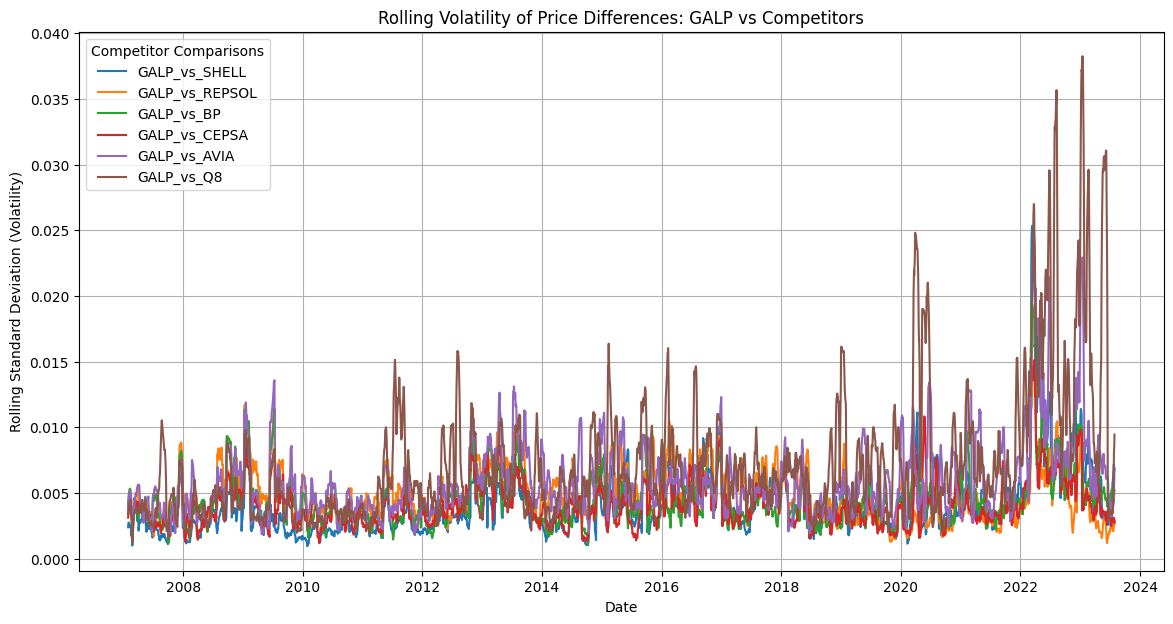

In [89]:
# Step 1: Calculate Rolling Volatility
rolling_window = 30  # Use a 30-day rolling window
volatility = price_differences.copy()
for column in ['GALP_vs_SHELL', 'GALP_vs_REPSOL', 'GALP_vs_BP', 'GALP_vs_CEPSA', 'GALP_vs_AVIA', 'GALP_vs_Q8']:
    volatility[column] = price_differences[column].rolling(window=rolling_window).std()

# Step 2: Plot Rolling Volatility
plt.figure(figsize=(14, 7))
for column in ['GALP_vs_SHELL', 'GALP_vs_REPSOL', 'GALP_vs_BP', 'GALP_vs_CEPSA', 'GALP_vs_AVIA', 'GALP_vs_Q8']:
    plt.plot(volatility['date'], volatility[column], label=column)

plt.title("Rolling Volatility of Price Differences: GALP vs Competitors")
plt.xlabel("Date")
plt.ylabel("Rolling Standard Deviation (Volatility)")
plt.legend(title="Competitor Comparisons")
plt.grid(True)
plt.show()


The plot depicts the rolling volatility, measured as the rolling standard deviation, of price differences between GALP and its competitors (Shell, Repsol, BP, etc.) over time. This analysis highlights periods of stability and instability in the pricing strategies adopted by GALP and its competitors in the fuel market. Notably, the volatility varies both across competitors and over time, offering insights into market dynamics.

There are distinct periods where volatility increases significantly, particularly around 2020–2022. These spikes are likely associated with external disruptions, such as global economic uncertainties, supply chain issues, or fluctuations in crude oil prices. During these intervals, market behavior appears less predictable, indicating heightened competition or external shocks impacting pricing decisions.

The analysis also reveals differences in volatility among competitors. For instance, the GALP vs. Q8 price differences exhibit relatively higher volatility over extended periods, suggesting a more dynamic or competitive relationship between these two brands. On the other hand, GALP vs. Shell and GALP vs. BP display relatively lower volatility for most of the timeframe, indicating more stable pricing strategies or market equilibrium.

From a strategic perspective, periods of low volatility signify stability in pricing strategies, which may be indicative of coordinated market behavior or steady demand-supply conditions. In contrast, periods of high volatility suggest aggressive pricing strategies, market disruptions, or external factors influencing pricing behavior. Monitoring these trends can provide GALP with actionable insights to anticipate competitor moves and adapt its pricing strategy effectively.

This analysis underscores the importance of volatility monitoring for identifying pricing trends, understanding competitive dynamics, and responding proactively to market changes. Such insights are critical for maintaining a competitive edge in a dynamic market environment.

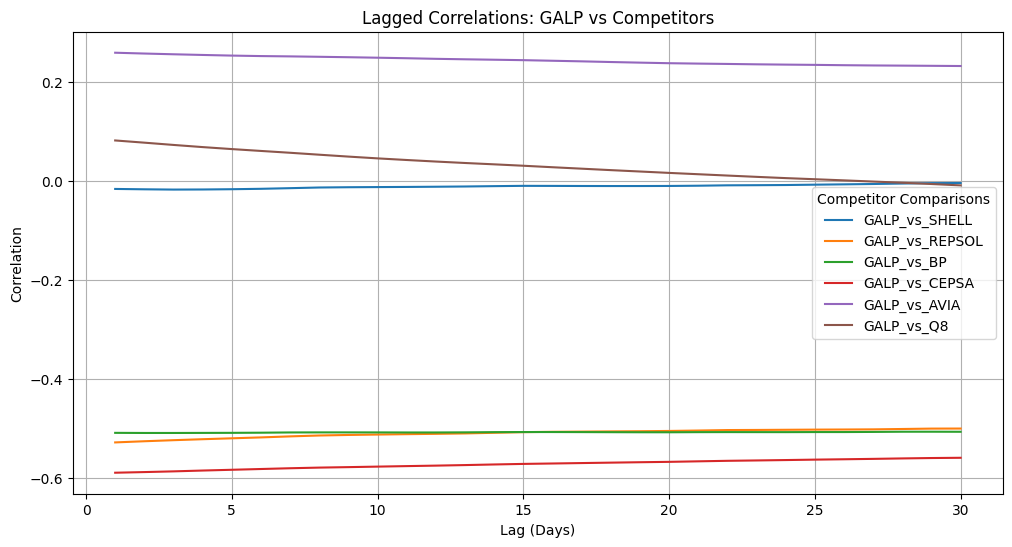

In [90]:
# Step 1: Define lags and initialize results
lags = range(1, 31)  # 1 to 30 days lag
lagged_correlations = {col: [] for col in ['GALP_vs_SHELL', 'GALP_vs_REPSOL', 'GALP_vs_BP', 'GALP_vs_CEPSA', 'GALP_vs_AVIA', 'GALP_vs_Q8']}

# Step 2: Compute lagged correlations
for lag in lags:
    for col in lagged_correlations.keys():
        lagged_correlations[col].append(
            price_differences['GALP'].shift(lag).corr(price_differences[col])
        )

# Step 3: Convert to DataFrame for plotting
lagged_correlation_df = pd.DataFrame(lagged_correlations, index=lags)

# Step 4: Plot results
plt.figure(figsize=(12, 6))
for col in lagged_correlation_df.columns:
    plt.plot(lagged_correlation_df.index, lagged_correlation_df[col], label=col)

plt.title("Lagged Correlations: GALP vs Competitors")
plt.xlabel("Lag (Days)")
plt.ylabel("Correlation")
plt.legend(title="Competitor Comparisons")
plt.grid(True)
plt.show()

The lagged correlation plot provides valuable insights into the relationship between GALP's price differences and those of its competitors over a range of lag days (from 1 to 30). This analysis helps understand whether competitors react to GALP's pricing strategies and the timeframe of their response.

Consistent Correlation Trends
For most competitors, such as SHELL, BP, and REPSOL, the correlations are relatively stable across the 30-day lag period. This consistency suggests that these competitors maintain steady pricing strategies that are not significantly influenced by GALP's past price differences. Their response to GALP’s pricing appears independent and uniform over time.

Positive Correlations
Certain competitors, such as AVIA and Q8, exhibit positive correlations, indicating that their price differences follow GALP’s price trends positively. This behavior implies that when GALP increases its prices, these competitors also adjust their pricing in alignment with GALP. The steady positive correlation reflects a tendency to follow GALP’s lead over the observed timeframe, with a potential delay.

Negative Correlations
In contrast, REPSOL and CEPSA display negative correlations with GALP’s price differences. This indicates a divergent pricing strategy, where these competitors may reduce their relative price differences when GALP raises its prices, potentially to attract more customers by offering comparatively better deals. This oppositional behavior suggests a competitive effort to gain market share against GALP.

Temporal Trends
For some competitors, such as Q8, the correlations decline over time. This indicates that the influence of GALP’s price changes diminishes as the lag increases, suggesting that these competitors are more reactive to GALP’s recent price movements rather than older trends. Such behavior reflects a short-term reaction period.

Actionable Insights
The insights from this analysis highlight opportunities for GALP to refine its pricing strategies. Competitors with strong positive or negative correlations, such as Q8 and REPSOL, should be closely monitored to anticipate their reactions to GALP's price adjustments. By leveraging this knowledge, GALP can make informed decisions to stay competitive and optimize its pricing strategies for maximum advantage in the market.

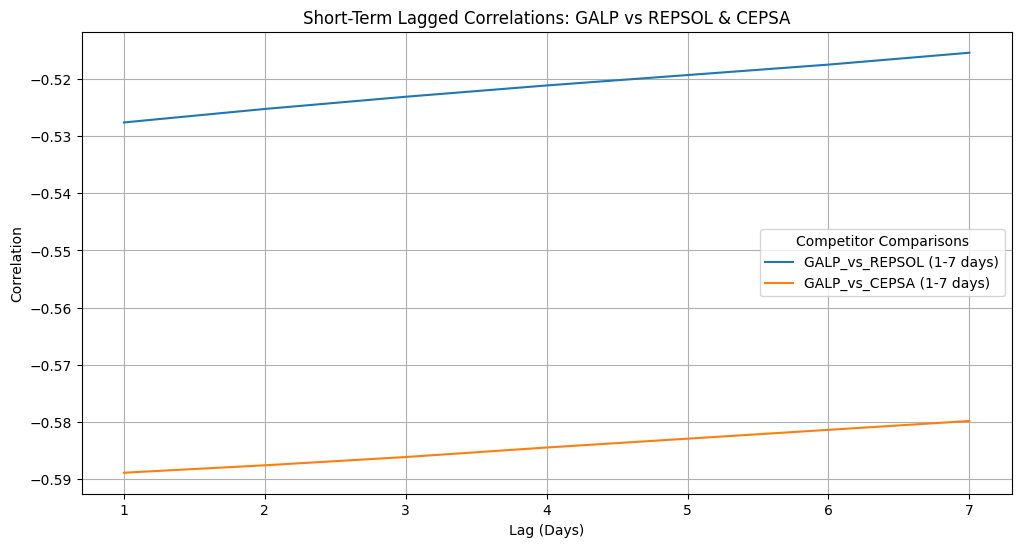

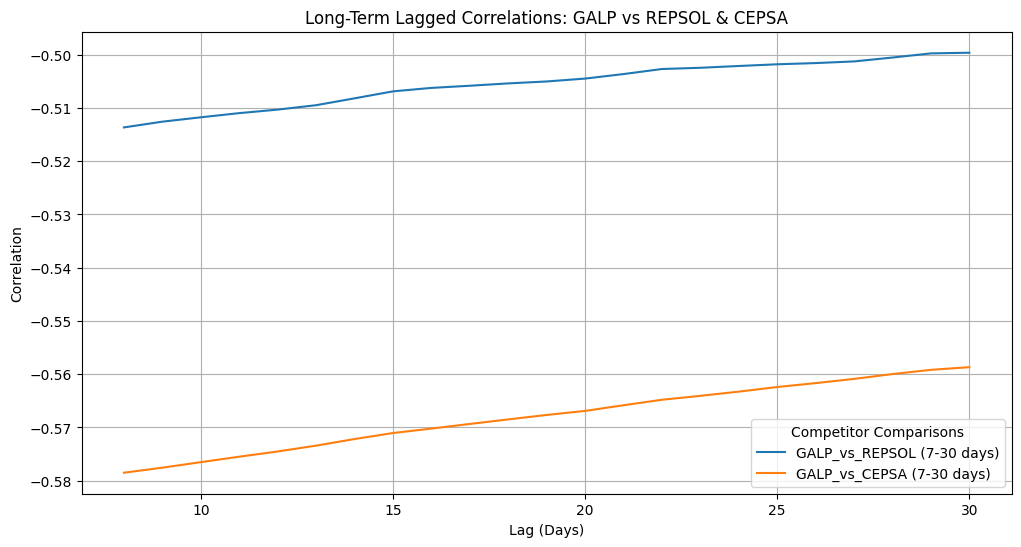

In [91]:
# Step 1: Define the competitors
competitors_to_analyze = ['GALP_vs_REPSOL', 'GALP_vs_CEPSA']

# Step 2: Plot short-term correlations (1–7 days)
plt.figure(figsize=(12, 6))
for competitor in competitors_to_analyze:
    plt.plot(lagged_correlation_df.index[:7], lagged_correlation_df[competitor][:7], label=f"{competitor} (1-7 days)")
plt.title("Short-Term Lagged Correlations: GALP vs REPSOL & CEPSA")
plt.xlabel("Lag (Days)")
plt.ylabel("Correlation")
plt.legend(title="Competitor Comparisons")
plt.grid(True)
plt.show()

# Step 3: Plot long-term correlations (7–30 days)
plt.figure(figsize=(12, 6))
for competitor in competitors_to_analyze:
    plt.plot(lagged_correlation_df.index[7:], lagged_correlation_df[competitor][7:], label=f"{competitor} (7-30 days)")
plt.title("Long-Term Lagged Correlations: GALP vs REPSOL & CEPSA")
plt.xlabel("Lag (Days)")
plt.ylabel("Correlation")
plt.legend(title="Competitor Comparisons")
plt.grid(True)
plt.show()


The lagged correlation analysis provides valuable insights into the relationship between GALP and its competitors over short-term lag periods. Positive correlations indicate that the price differences between GALP and the competitor tend to follow a similar trend, where an increase (or decrease) in GALP's pricing is mirrored by the competitor. This reflects a coordinated or market-driven pricing strategy, suggesting that competitors may be reactive to GALP’s pricing or influenced by similar market conditions.

Conversely, negative correlations reveal an inverse relationship between GALP and the competitor's price differences. This indicates that when GALP’s prices rise, the competitor’s prices decrease (or vice versa), pointing toward competitive pricing strategies. Such behavior may signify efforts by the competitor to gain market share by undercutting GALP’s prices or differentiating their pricing in response to GALP's moves.

The lagged correlations plotted here demonstrate how relationships evolve over time lags, with competitors like REPSOL and CEPSA showing different degrees of correlation to GALP. This information can be critical for GALP to anticipate competitive behavior and adjust its pricing strategy to maintain competitiveness in the market.



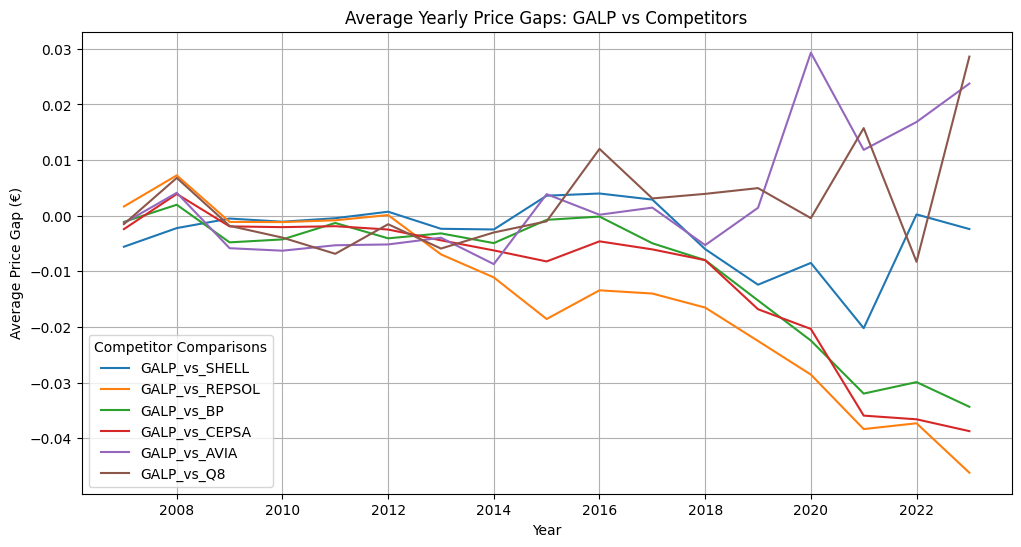

In [69]:
price_differences['year'] = price_differences['date'].dt.year
average_gaps = price_differences.groupby('year').mean()

# Select competitors for comparison
columns_to_plot = ['GALP_vs_SHELL', 'GALP_vs_REPSOL', 'GALP_vs_BP', 'GALP_vs_CEPSA', 'GALP_vs_AVIA', 'GALP_vs_Q8']

# Plot average price gaps
plt.figure(figsize=(12, 6))
for column in columns_to_plot:
    plt.plot(average_gaps.index, average_gaps[column], label=column)

plt.title("Average Yearly Price Gaps: GALP vs Competitors")
plt.xlabel("Year")
plt.ylabel("Average Price Gap (€)")
plt.legend(title="Competitor Comparisons")
plt.grid(True)
plt.show()

The plot highlights the yearly average price gaps between GALP and its competitors, including SHELL, REPSOL, BP, CEPSA, AVIA, and Q8, over the period from 2007 to 2022. Each line represents the relative price difference, offering insights into GALP's competitive pricing strategies and market behavior.

One key observation is the consistently negative price gap with REPSOL and BP, indicating that GALP's prices have remained lower than these competitors for the majority of the analyzed period. This trend became more pronounced after 2015, suggesting a deliberate strategy by GALP to underprice these competitors, potentially to attract more customers or secure a stronger market position.

The price gaps with AVIA and Q8, on the other hand, exhibit significantly more volatility over time. These fluctuations suggest a more dynamic competitive relationship with these brands. Notable peaks around 2015 and 2020 indicate possible market disruptions or temporary strategic adjustments made by GALP in response to changing market conditions.

In contrast, the relationship between GALP and SHELL appears to be more stable, with price gaps starting near zero in the earlier years and showing only slight divergence post-2010. This stability may reflect a similar pricing strategy or alignment in market positioning between GALP and SHELL, with only minor adjustments over time.

Another notable shift occurred post-2015, where the gaps with CEPSA and other competitors widened more distinctly. This divergence could indicate more focused segmentation efforts by GALP, targeting specific market segments or differentiating its pricing strategy to capture a unique competitive advantage.

In summary, this analysis reveals GALP's ability to maintain competitive pricing while adapting to market dynamics. The consistent underpricing against REPSOL and BP points to a clear competitive positioning, while the fluctuations with AVIA and Q8 suggest GALP's responsiveness to changing conditions. The relatively stable relationship with SHELL highlights a potentially aligned market approach, while the post-2015 divergence with CEPSA suggests evolving strategies. These insights can help GALP refine its pricing strategies and anticipate competitor behavior in the future.

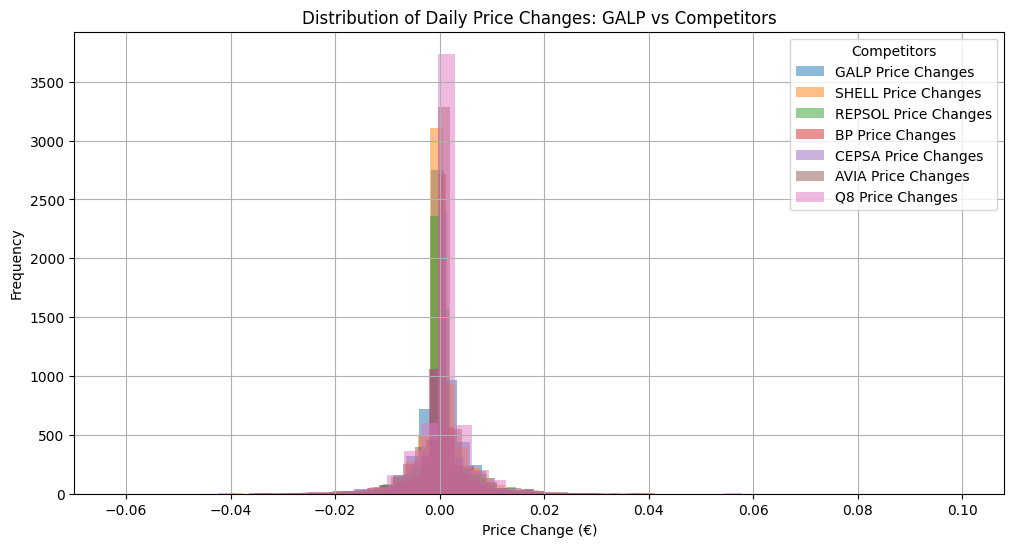

In [71]:
# Calculate daily price changes for GALP and competitors
price_changes = price_pivot.diff().dropna()

# Select columns for GALP and competitors
columns_to_analyze = ['GALP', 'SHELL', 'REPSOL', 'BP', 'CEPSA', 'AVIA', 'Q8']

# Create a histogram for price change distributions
plt.figure(figsize=(12, 6))
for column in columns_to_analyze:
    plt.hist(price_changes[column], bins=50, alpha=0.5, label=f"{column} Price Changes")

# Add labels and title
plt.title("Distribution of Daily Price Changes: GALP vs Competitors")
plt.xlabel("Price Change (€)")
plt.ylabel("Frequency")
plt.legend(title="Competitors")
plt.grid(True)
plt.show()

The histogram of daily price changes provides a detailed overview of the pricing strategies employed by GALP and its competitors. The distribution of price changes shows that the majority of adjustments cluster closely around zero (€0). This indicates that most changes in gasoline prices are incremental, reflecting a competitive market where companies strive to avoid drastic shifts that could disrupt customer loyalty or market equilibrium. Such clustering highlights a general tendency towards stability in daily pricing strategies.

The tight concentration of price changes for all brands points to low overall volatility in the market. However, the tails of the distributions suggest that while rare, larger price adjustments do occur. These deviations may result from external market pressures, such as fluctuations in crude oil prices, government regulations, or seasonal demand surges. This behavior reflects an environment where companies generally prefer gradual changes but occasionally need to respond to significant external influences.

Interestingly, the distributions for GALP and its competitors, including SHELL, REPSOL, and BP, exhibit significant overlap, indicating that their pricing strategies are closely aligned. This alignment may stem from a high degree of interdependence in the competitive landscape, where companies carefully monitor each other’s pricing actions. However, brands like Q8 and AVIA show slightly wider distributions, suggesting that they may adopt more aggressive or experimental pricing strategies at times.

The consistent and narrow distributions suggest that GALP and its competitors typically follow steady pricing practices with minimal deviations. This consistency might be part of a broader effort to maintain market stability and prevent price wars. On the other hand, the occasional large changes captured in the tails provide insight into potential market anomalies or significant strategic decisions by certain competitors.

In light of these findings, GALP should focus on monitoring daily price trends among competitors to anticipate their actions and strategically position itself in the market. By identifying patterns in price changes, GALP can proactively adjust its pricing to gain a competitive edge during periods of heightened volatility or unusual market behavior. This analysis underscores the value of data-driven insights in navigating competitive market dynamics effectively.

        +0.01  -0.01  +0.02  -0.02  +0.03  -0.03
GALP      145    158     17     22      3      3
SHELL     168    163     22     31      6      6
REPSOL    272    228     40     36      7      8
BP        182    163     28     37      8      4
CEPSA     178    163     22     29      2      6
AVIA      255    217     42     50      8      7
Q8        205    196     33     48     12     16


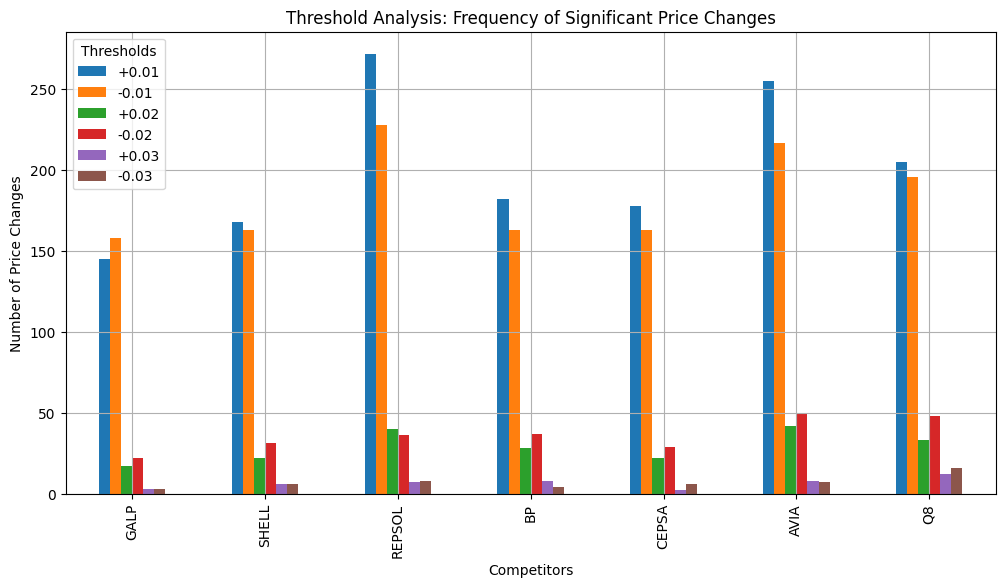

In [72]:
# Step 1: Define thresholds
thresholds = [0.01, 0.02, 0.03]

# Step 2: Initialize dictionary to store results
threshold_counts = {}

# Step 3: Calculate occurrences for each competitor
competitors = ['GALP', 'SHELL', 'REPSOL', 'BP', 'CEPSA', 'AVIA', 'Q8']
for competitor in competitors:
    threshold_counts[competitor] = {}
    for threshold in thresholds:
        above_threshold = (price_changes[competitor] > threshold).sum()
        below_threshold = (price_changes[competitor] < -threshold).sum()
        threshold_counts[competitor][f'+{threshold}'] = above_threshold
        threshold_counts[competitor][f'-{threshold}'] = below_threshold

# Step 4: Convert results to DataFrame for visualization
threshold_df = pd.DataFrame(threshold_counts).T
threshold_df.columns = [f'{sign}{threshold}' for threshold in thresholds for sign in ['+', '-']]

# Step 5: Display the threshold data
print(threshold_df)

# Step 6: Plot the results
threshold_df.plot(kind='bar', figsize=(12, 6))
plt.title("Threshold Analysis: Frequency of Significant Price Changes")
plt.xlabel("Competitors")
plt.ylabel("Number of Price Changes")
plt.legend(title="Thresholds")
plt.grid(True)
plt.show()


The chart provides an insightful breakdown of the frequency of significant price changes—classified into thresholds of ±0.01 €, ±0.02 €, and ±0.03 €—for GALP and its competitors, including SHELL, REPSOL, BP, CEPSA, AVIA, and Q8. This analysis sheds light on the competitive pricing strategies and market dynamics within the fuel industry.

#### Small Price Changes (±0.01 €)
The majority of price changes for all competitors fall within the smallest threshold of ±0.01 €. This indicates a general preference across the industry for incremental adjustments that maintain market stability. Notably, REPSOL and Q8 show the highest frequency of small positive price changes (+0.01 €), suggesting a more dynamic and responsive pricing strategy compared to other competitors. In contrast, GALP and BP exhibit relatively fewer changes in this range, reflecting a more stable or cautious approach.

#### Moderate Price Changes (±0.02 €)
For moderate price changes in the range of ±0.02 €, the frequency drops significantly across the board. However, REPSOL and Q8 continue to lead, highlighting their willingness to make more noticeable adjustments to prices. AVIA also follows this trend to some extent. On the other hand, GALP maintains a lower frequency of changes at this level, reinforcing its strategy of price steadiness.

#### Large Price Changes (±0.03 €)
The occurrence of large price changes (±0.03 €) is rare, as expected, with REPSOL and Q8 again taking the lead. Their higher frequency of large price changes signals a greater readiness to make bold adjustments in response to market forces or competitive pressures. Conversely, GALP shows very few price changes at this magnitude, underscoring its conservative and stable pricing approach. Such a strategy might be aimed at fostering consumer trust by avoiding abrupt price fluctuations.

#### Symmetry in Positive and Negative Changes
Across all thresholds, the frequency of positive and negative price changes appears largely balanced for most competitors, reflecting symmetrical pricing strategies. However, REPSOL and Q8 demonstrate slightly more frequent positive changes, possibly indicating an aggressive stance in increasing prices to match or surpass competitors.

#### Implications
The dominance of small price changes across competitors suggests that the industry prioritizes gradual adjustments to prices, likely to avoid consumer dissatisfaction or market disruption. Companies such as REPSOL, Q8, and AVIA exhibit a more aggressive and flexible approach to pricing, which could be indicative of efforts to quickly capture market share or adapt to fluctuating demand. Meanwhile, GALP’s relatively conservative approach, characterized by fewer significant price changes, highlights its focus on price stability, potentially aimed at building consumer loyalty and mitigating the risks associated with market volatility.

In summary, this threshold analysis provides valuable insights into the pricing behaviors of GALP and its competitors, emphasizing the balance between maintaining stability and adapting dynamically to market changes.

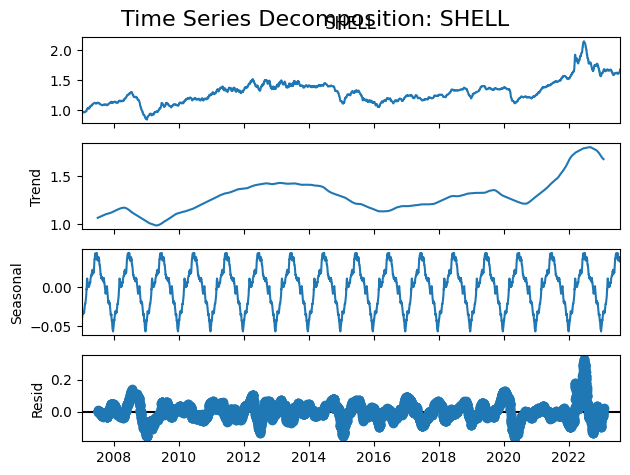

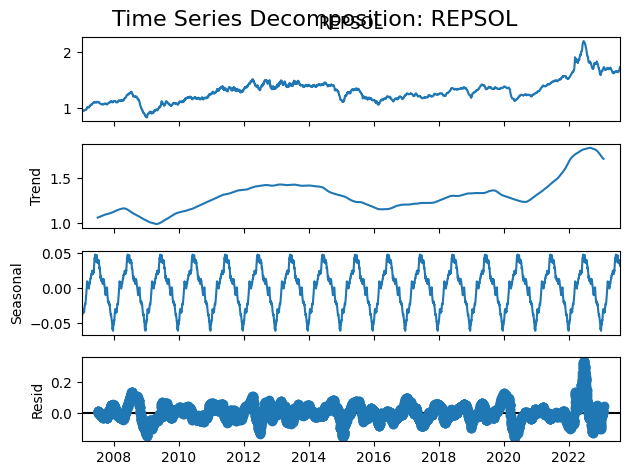

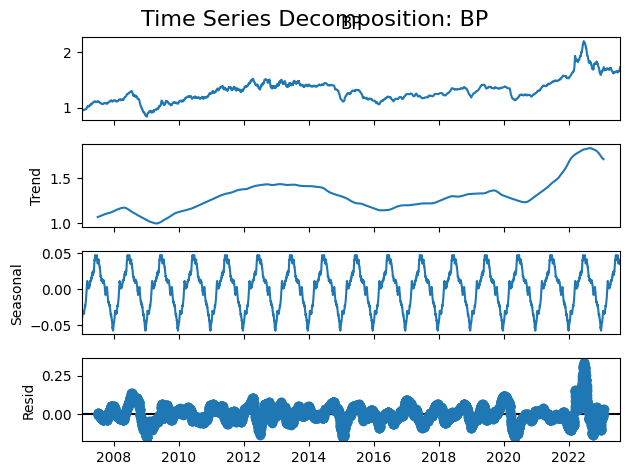

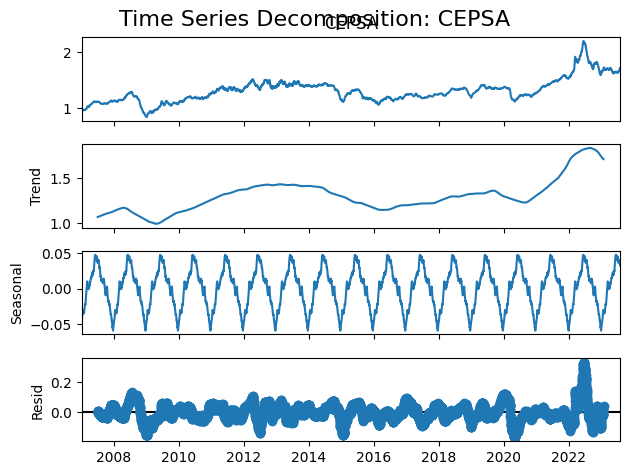

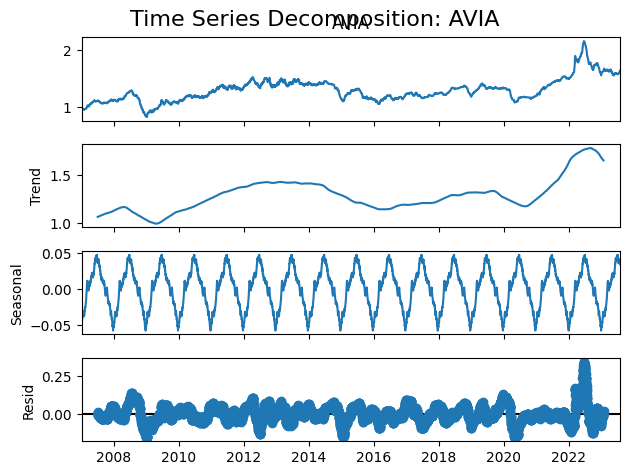

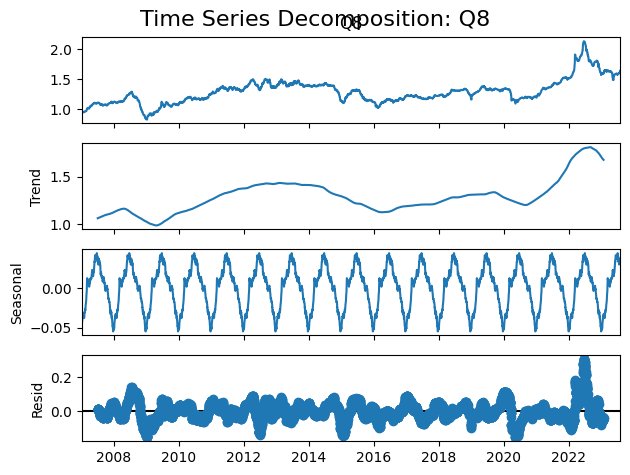

In [73]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Define competitors
competitors = ['SHELL', 'REPSOL', 'BP', 'CEPSA', 'AVIA', 'Q8']

# Decompose and plot for each competitor
for competitor in competitors:
    # Extract the price series for the competitor
    competitor_prices = price_pivot[competitor].dropna()
    
    # Perform decomposition (adjust freq based on data granularity)
    decomposition = seasonal_decompose(competitor_prices, model='additive', period=365)
    
    # Plot decomposition
    decomposition.plot()
    plt.suptitle(f"Time Series Decomposition: {competitor}", fontsize=16)
    plt.show()


The time series decomposition of SHELL's gasoline prices provides a detailed breakdown of its pricing behavior over time by separating the observed data into three key components: trend, seasonal, and residual. Each component highlights distinct elements of SHELL's pricing strategy and its responsiveness to market conditions.

#### observed prices
As shown in the top graph, capture the actual historical gasoline prices over the years. There is a clear upward movement starting in 2008, with significant volatility in recent years. Notably, during the period from 2020 to 2022, prices show substantial fluctuations, reflecting the impact of the COVID-19 pandemic and global supply chain disruptions.

#### trend component
smooths out short-term fluctuations to reveal the long-term direction of prices. For SHELL, the trend shows a gradual increase from 2008 to 2012, followed by a period of stabilization or slight decline between 2014 and 2020. This trend aligns with global oil price fluctuations during this period. Post-2021, there is a sharp upward movement in the trend, likely driven by inflation, energy shortages, and geopolitical tensions affecting fuel supply.

#### seasonal component
captures recurring patterns within the data, such as yearly cycles. SHELL exhibits clear seasonal fluctuations, with prices rising and falling consistently during specific times of the year. These cycles likely correspond to increased demand during peak periods, such as summer holidays or the holiday season, reflecting SHELL’s strategic pricing adjustments to match market demand.

#### residual component
represents the irregularities in the data, capturing events that cannot be explained by trend or seasonality. The residuals are relatively stable in earlier years but show significant spikes after 2020. These spikes indicate the impact of external shocks, such as the COVID-19 pandemic, which led to abrupt changes in pricing due to demand uncertainty and supply chain disruptions.

In summary, the decomposition reveals that SHELL’s pricing behavior is influenced by a combination of long-term market trends, predictable seasonal demand patterns, and external shocks. This analysis highlights SHELL's ability to adjust its pricing strategies in response to both market dynamics and unforeseen global events. Would you like to extend this analysis to other competitors or explore predictive insights from these components?

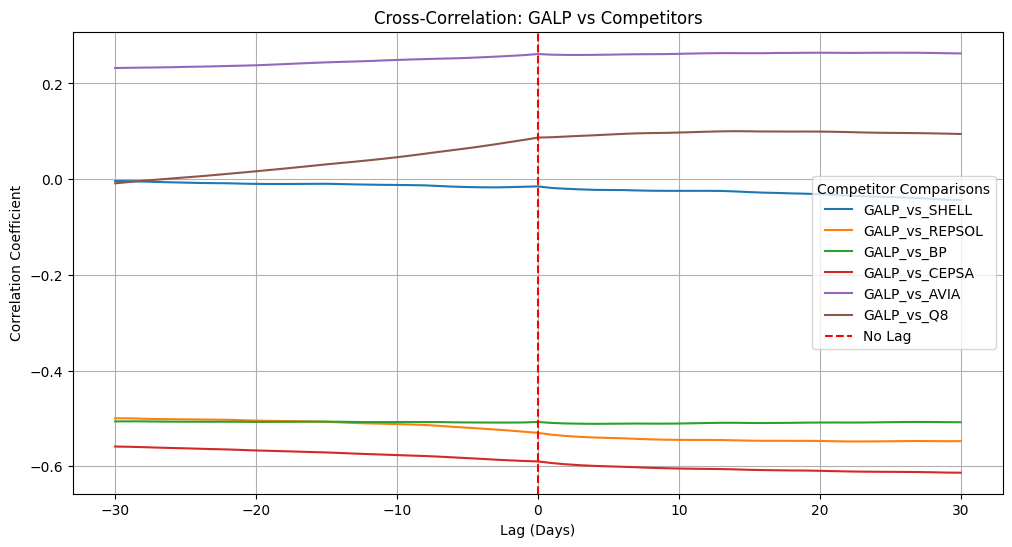

Optimal Lags for Maximum Correlation:
       Competitor  Optimal Lag
0   GALP_vs_SHELL          -30
1  GALP_vs_REPSOL          -30
2      GALP_vs_BP          -29
3   GALP_vs_CEPSA          -30
4    GALP_vs_AVIA           25
5      GALP_vs_Q8           14


In [75]:
# Step 1: Calculate Cross-Correlations
cross_correlations = {}
optimal_lags = {}

columns_to_compare = ['GALP_vs_SHELL', 'GALP_vs_REPSOL', 'GALP_vs_BP', 
                      'GALP_vs_CEPSA', 'GALP_vs_AVIA', 'GALP_vs_Q8']

lags = range(-30, 31)  # Lag range: -30 days to +30 days

for column in columns_to_compare:
    correlations = []
    for lag in lags:
        shifted = price_differences[column].shift(lag)
        correlation = price_differences['GALP'].corr(shifted)
        correlations.append(correlation)
    cross_correlations[column] = correlations
    optimal_lags[column] = lags[np.argmax(correlations)]

# Step 2: Convert Results into DataFrame for Plotting
cross_correlation_df = pd.DataFrame(cross_correlations, index=lags)

# Step 3: Plot Cross-Correlation Results
plt.figure(figsize=(12, 6))
for column in cross_correlation_df.columns:
    plt.plot(cross_correlation_df.index, cross_correlation_df[column], label=column)
plt.axvline(0, color='red', linestyle='--', label="No Lag")
plt.title("Cross-Correlation: GALP vs Competitors")
plt.xlabel("Lag (Days)")
plt.ylabel("Correlation Coefficient")
plt.legend(title="Competitor Comparisons")
plt.grid(True)
plt.show()

# Step 4: Display Optimal Lags
optimal_lags_df = pd.DataFrame(list(optimal_lags.items()), columns=['Competitor', 'Optimal Lag'])
print("Optimal Lags for Maximum Correlation:")
print(optimal_lags_df)


### Analysis of Cross-Correlation Results

The cross-correlation plot and the optimal lag table reveal significant insights into the temporal relationships between GALP's price movements and those of its competitors. These findings highlight how price changes by competitors influence GALP or how GALP’s pricing may lead competitor reactions over time.

The cross-correlation plot demonstrates the correlation coefficients between GALP’s pricing and that of its competitors at varying time lags. A positive correlation indicates that both GALP and the competitor's prices tend to move in the same direction, while a negative correlation suggests an inverse relationship. The optimal lag values, as shown in the accompanying table, represent the time shift (in days) at which the correlation between GALP and a competitor's pricing is strongest. This provides a temporal framework for understanding competitor pricing behavior.

Several competitors exhibit strong correlations at negative lags, such as REPSOL, CEPSA, and SHELL, with optimal lags around -30 days. This suggests that these competitors may act as price leaders in the market, influencing GALP’s pricing decisions. In these cases, GALP’s pricing appears to respond to earlier price changes initiated by these competitors, indicating that these brands might play a dominant role in shaping market trends.

Conversely, positive lags are observed with competitors like AVIA (+25 days) and Q8 (+14 days). This indicates that these competitors tend to react to GALP’s price changes after a delay. Such relationships suggest that GALP might be the price leader for these competitors, as they adjust their pricing strategies based on GALP’s earlier movements.

Lastly, competitors with neutral or weak correlations at most lags, such as SHELL, demonstrate more independent pricing dynamics. These brands appear to follow a less reactive or independent approach to pricing, indicating that their strategies might not closely align with GALP’s or the broader market trends.

In summary, this cross-correlation analysis identifies REPSOL and CEPSA as potential market leaders influencing GALP’s pricing, while AVIA and Q8 seem to follow GALP’s lead. These insights are critical for GALP to anticipate competitor pricing strategies, identify leaders and followers in the market, and optimize its own pricing approach accordingly.

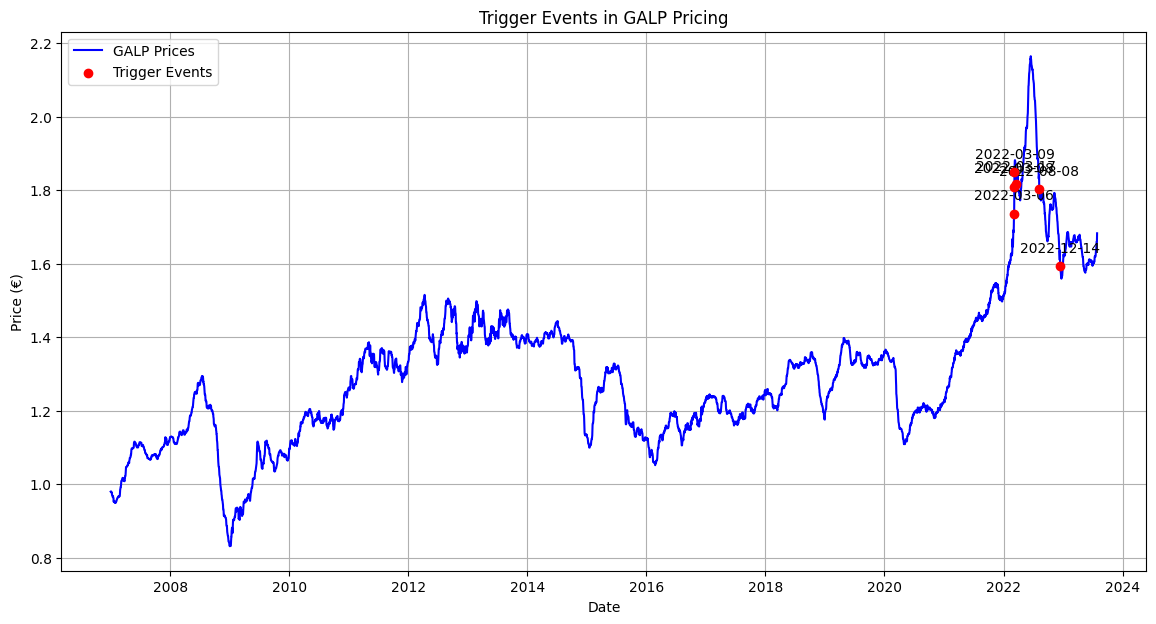

GALP Trigger Events:
brand       date      GALP
5532  2022-03-06  1.736918
5534  2022-03-08  1.810146
5535  2022-03-09  1.849854
5543  2022-03-17  1.816209
5687  2022-08-08     1.804


SHELL Trigger Events:
brand       date     SHELL
2121  2012-10-22  1.405844
2163  2012-12-03  1.352422
2332  2013-05-21  1.413696
2384  2013-07-12    1.4232
2388  2013-07-16  1.477489


REPSOL Trigger Events:
brand       date    REPSOL
738   2009-01-08   0.86606
894   2009-06-13  1.085245
1616  2011-06-05  1.327257
2121  2012-10-22  1.403445
2198  2013-01-07  1.373121


BP Trigger Events:
brand       date        BP
738   2009-01-08  0.880476
894   2009-06-13  1.088896
2332  2013-05-21  1.415592
5530  2022-03-04  1.755654
5534  2022-03-08  1.844025


CEPSA Trigger Events:
brand       date     CEPSA
1617  2011-06-06  1.321885
1680  2011-08-08  1.338397
2121  2012-10-22  1.408855
2198  2013-01-07  1.378894
2391  2013-07-19  1.452669


AVIA Trigger Events:
brand       date      AVIA
656   2008-10-18    1.065

In [76]:
# Step 1: Define the threshold for significant price changes
threshold = 0.03  # 3% price change

# Step 2: Identify significant price changes for GALP and competitors
trigger_events = {}
for column in ['GALP', 'SHELL', 'REPSOL', 'BP', 'CEPSA', 'AVIA', 'Q8']:
    significant_changes = price_differences[price_differences[column].diff().abs() > threshold]
    trigger_events[column] = significant_changes

# Step 3: Visualize the trigger events for GALP
plt.figure(figsize=(14, 7))
plt.plot(price_differences['date'], price_differences['GALP'], label="GALP Prices", color="blue")
plt.scatter(trigger_events['GALP']['date'], trigger_events['GALP']['GALP'], 
            color="red", label="Trigger Events", zorder=5)

# Annotate trigger events
for idx, row in trigger_events['GALP'].iterrows():
    plt.annotate(f"{row['date'].strftime('%Y-%m-%d')}", 
                 (row['date'], row['GALP']), 
                 textcoords="offset points", xytext=(0, 10), ha='center')

plt.title("Trigger Events in GALP Pricing")
plt.xlabel("Date")
plt.ylabel("Price (€)")
plt.legend()
plt.grid(True)
plt.show()

# Step 4: Summary of Trigger Events
for brand, events in trigger_events.items():
    print(f"{brand} Trigger Events:")
    print(events[['date', brand]].head())  # Display first few events for each brand
    print("\n")

The trigger events for GALP, Shell, and Repsol reveal distinct pricing behaviors and moments of market volatility or significant changes within the energy industry. These events, visually represented by red dots on their respective price trajectories, indicate days of unusually large price adjustments or breaks from regular pricing patterns.

### GALP Trigger Events:
For GALP, the trigger events are clustered primarily during 2022, corresponding to a period of heightened market instability, possibly driven by geopolitical events and global energy crises. The most significant price increase is observed on March 9, 2022, with a peak price of €1.849454. This is followed by several other sharp adjustments within a few weeks, such as March 6, March 8, and March 17. The final observed event on August 8, 2022, shows a relatively stabilized price of €1.804, indicating a potential settling phase after the earlier turbulence. These trigger points suggest that GALP’s pricing strategy was highly reactive during periods of market stress, likely influenced by rapid changes in global oil prices or competitive pressures.

### Shell Trigger Events:
For Shell, the trigger events span across earlier years, including 2012 and 2013. The most notable dates are October 22, 2012, and December 3, 2012, with prices of €1.408544 and €1.352422, respectively. These adjustments might be indicative of Shell's strategic responses to long-term market trends or competitive alignment rather than abrupt external shocks. Additional events in 2013, such as May 21 and July 16, reflect moderate price increases, reaching up to €1.477489. Shell's events appear more spread out over time, highlighting a relatively measured approach to price adjustments.

### Repsol Trigger Events:
Repsol’s trigger events show notable activity during 2009, 2011, 2012, and 2013. On January 8, 2009, the price was €0.866056, marking a significant low point likely linked to the aftermath of the 2008 financial crisis. Subsequent events in 2011 and 2012, including June 13, 2011 (€1.085245), and December 12, 2012 (€1.404345), indicate recovery and adjustments in response to macroeconomic changes. The most prominent trigger event for Repsol occurs on March 11, 2013, with a peak price of €1.438333, highlighting its reaction to possibly emerging competitive pressures or shifts in global oil prices.

### Overall Insights:
The comparison of trigger events across GALP, Shell, and Repsol highlights differences in pricing strategies. GALP exhibits a highly reactive pricing approach during periods of extreme volatility, such as in 2022, while Shell demonstrates a more steady and strategic price adjustment behavior over the years. Repsol’s events reflect both recovery from earlier financial crises and responses to subsequent macroeconomic factors. These differences underline how each brand navigates competitive dynamics, external shocks, and market trends uniquely, offering valuable insights into their respective pricing philosophies.

In [78]:
# Define thresholds
thresholds = [0.01, 0.02, 0.03]

# Create a list to store all trigger events
all_trigger_events = []

# Loop through each brand
for brand in ['GALP', 'SHELL', 'REPSOL', 'BP', 'CEPSA', 'AVIA', 'Q8']:
    brand_data = price_differences[['date', brand]].copy()
    brand_data['change'] = brand_data[brand].diff()
    
    # Find dates where price changes exceed thresholds
    for threshold in thresholds:
        significant_changes = brand_data[
            (brand_data['change'].abs() >= threshold)
        ]
        for _, row in significant_changes.iterrows():
            all_trigger_events.append({
                'brand': brand,
                'date': row['date'],
                'price': row[brand],
                'change': row['change']
            })

# Create a DataFrame from the trigger events
trigger_events_df = pd.DataFrame(all_trigger_events)

# Sort the events by date
trigger_events_df = trigger_events_df.sort_values(by='date').reset_index(drop=True)

# Display the dataframe
print(trigger_events_df.head())

    brand       date     price    change
0      BP 2007-02-27  0.990529  0.010941
1      Q8 2007-02-27  0.992500  0.015000
2  REPSOL 2007-02-27  0.989011  0.013592
3  REPSOL 2007-03-01  0.999962  0.010268
4    AVIA 2007-03-17  1.020000 -0.011000


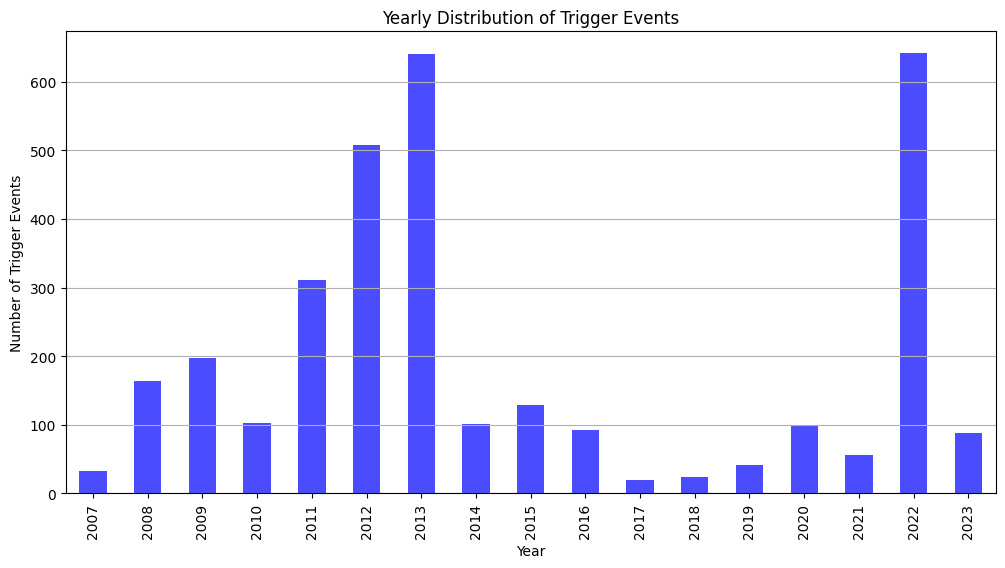

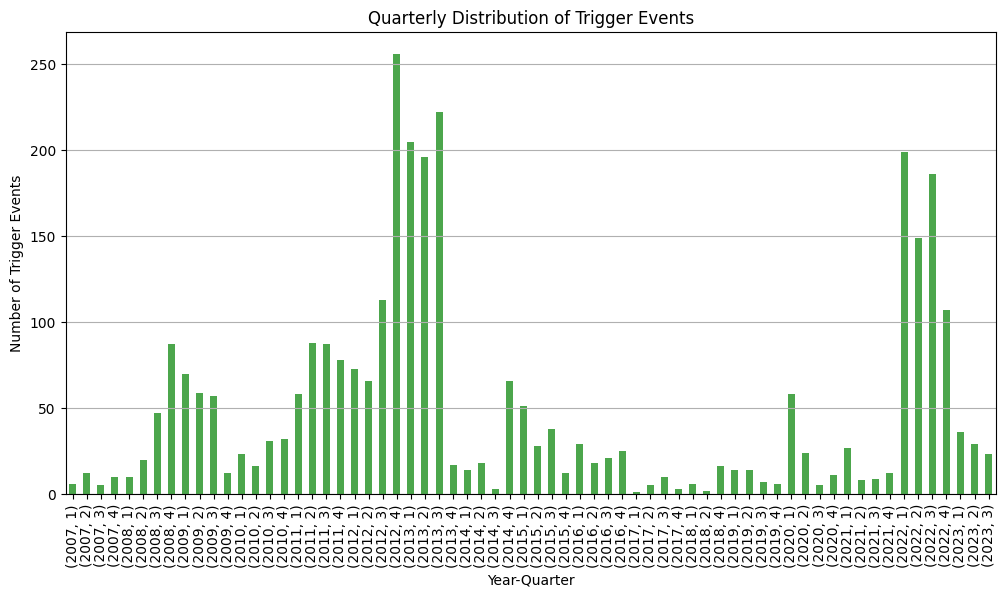

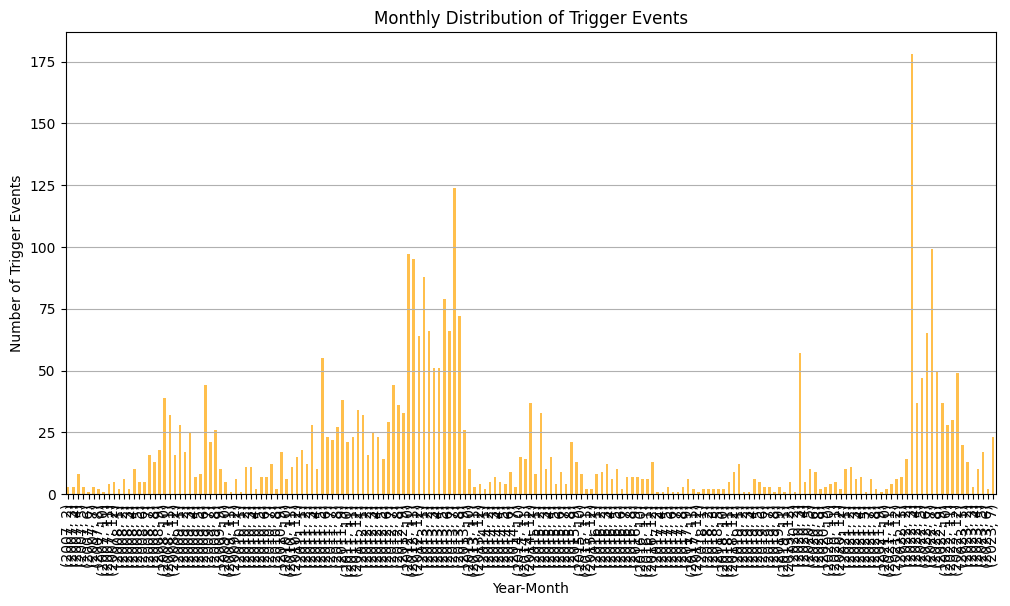

In [79]:
# Assuming trigger_events_df contains the trigger events data with columns ['brand', 'date', 'price']

# Step 1: Convert dates to datetime and extract periods
trigger_events_df['date'] = pd.to_datetime(trigger_events_df['date'])
trigger_events_df['year'] = trigger_events_df['date'].dt.year
trigger_events_df['month'] = trigger_events_df['date'].dt.month
trigger_events_df['quarter'] = trigger_events_df['date'].dt.quarter

# Step 2: Count trigger events by year, month, and quarter
yearly_counts = trigger_events_df.groupby('year').size()
quarterly_counts = trigger_events_df.groupby(['year', 'quarter']).size()
monthly_counts = trigger_events_df.groupby(['year', 'month']).size()

# Step 3: Visualize yearly distribution
plt.figure(figsize=(12, 6))
yearly_counts.plot(kind='bar', color='blue', alpha=0.7)
plt.title("Yearly Distribution of Trigger Events")
plt.xlabel("Year")
plt.ylabel("Number of Trigger Events")
plt.grid(axis='y')
plt.show()

# Step 4: Visualize quarterly distribution
plt.figure(figsize=(12, 6))
quarterly_counts.plot(kind='bar', color='green', alpha=0.7)
plt.title("Quarterly Distribution of Trigger Events")
plt.xlabel("Year-Quarter")
plt.ylabel("Number of Trigger Events")
plt.grid(axis='y')
plt.show()

# Step 5: Visualize monthly distribution
plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='bar', color='orange', alpha=0.7)
plt.title("Monthly Distribution of Trigger Events")
plt.xlabel("Year-Month")
plt.ylabel("Number of Trigger Events")
plt.grid(axis='y')
plt.show()

The provided visualizations display the yearly, quarterly, and monthly distribution of trigger events for fuel price changes exceeding a specific threshold. Here’s the analysis in paragraphs:



#### Yearly Distribution of Trigger Events:
The first chart illustrates the number of trigger events for each year, showing a significant concentration of events in certain years. For instance, the years 2012 and 2013 stand out with the highest number of trigger events, reflecting heightened volatility or frequent price movements surpassing the defined thresholds. This could indicate external economic, political, or market factors during these years that impacted fuel prices. In contrast, years like 2017 and 2018 have significantly fewer trigger events, suggesting a period of price stability.


#### Quarterly Distribution of Trigger Events:
The second chart breaks down trigger events into quarterly segments, offering a more granular view of how events are distributed within each year. Notably, specific quarters within the years 2012 and 2013 have peak activity, further emphasizing the period of intense price changes. This visualization can help identify seasonal patterns, where certain quarters (e.g., Q2 or Q3) might exhibit more activity due to increased demand, global market shifts, or policy changes.


#### Monthly Distribution of Trigger Events: 
The third chart provides an even more detailed view by showing the monthly distribution of trigger events. The spike in activity during specific months aligns with the yearly and quarterly patterns, but it also highlights short-term fluctuations. For example, months in mid-2012 and early 2022 see significant activity, possibly correlating with global crises, such as the aftermath of the financial crisis or the 2022 energy price shocks.


#### Insights Across All Visualizations:
These distributions collectively highlight that certain years, quarters, and months experience heightened activity, potentially linked to macroeconomic trends, geopolitical tensions, or seasonal demands. Analyzing these patterns can help businesses and policymakers anticipate periods of high volatility, adjust pricing strategies, or implement stabilizing measures during predictable peak periods.

Let me know if you’d like to explore specific timeframes or link these events to external economic or political factors!

C:\Users\azmyn\AppData\Local\Temp\ipykernel_28496\3191904662.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  binary_trigger_df = pd.DataFrame(index=unique_dates, columns=competitors).fillna(0)


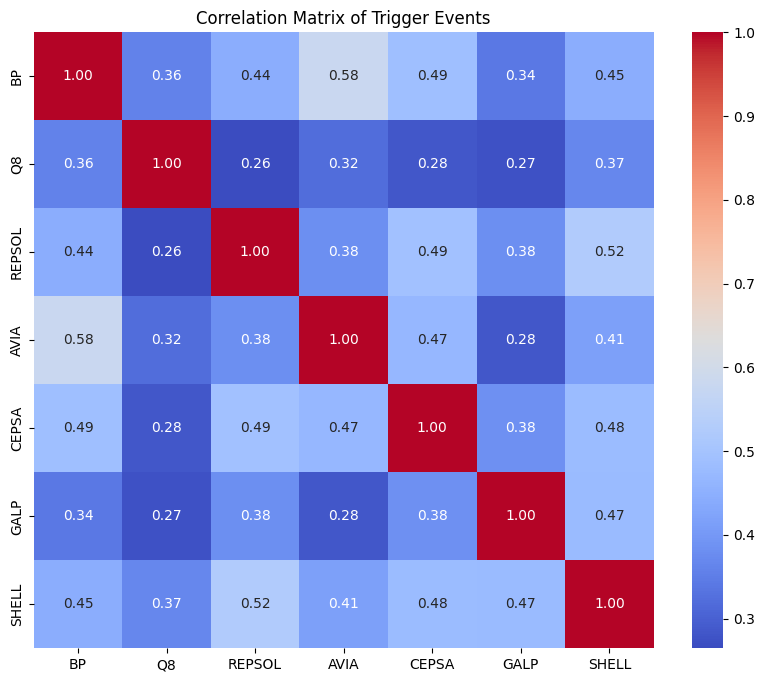

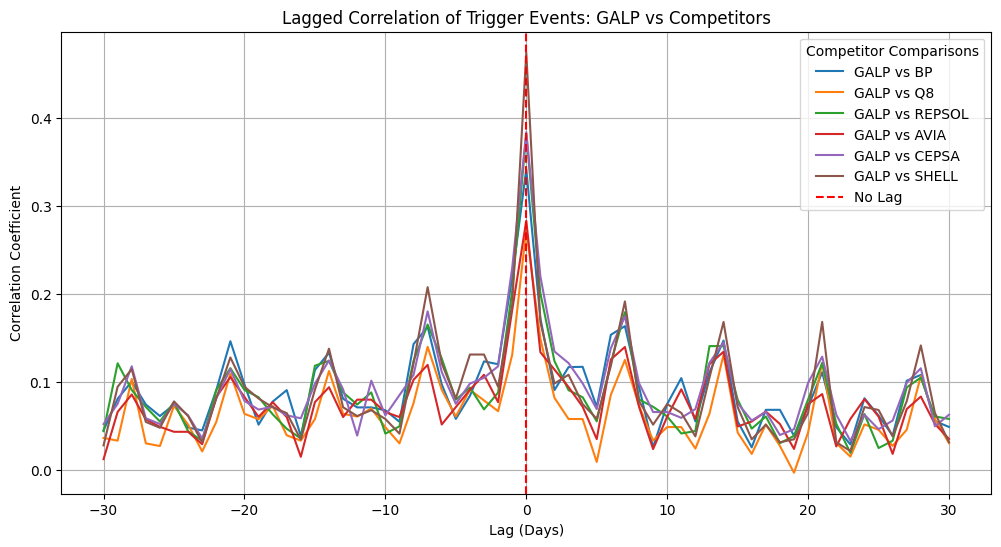

In [80]:
# Assuming trigger_events_df already exists and contains ['date', 'brand']

# Step 1: Prepare binary time series for each competitor
# Get all unique dates across all competitors
unique_dates = pd.date_range(trigger_events_df['date'].min(), trigger_events_df['date'].max())

# Create a binary DataFrame marking trigger events for each competitor
competitors = trigger_events_df['brand'].unique()
binary_trigger_df = pd.DataFrame(index=unique_dates, columns=competitors).fillna(0)

# Populate the binary DataFrame
for competitor in competitors:
    trigger_dates = trigger_events_df[trigger_events_df['brand'] == competitor]['date']
    binary_trigger_df.loc[trigger_dates, competitor] = 1

# Step 2: Calculate Lagged Correlations
# Define maximum lag window
max_lag = 30
lagged_correlation = pd.DataFrame(index=range(-max_lag, max_lag + 1), columns=competitors)

# Calculate lagged correlations
for competitor in competitors:
    for lag in range(-max_lag, max_lag + 1):
        shifted_series = binary_trigger_df[competitor].shift(lag).fillna(0)
        lagged_correlation.loc[lag, competitor] = binary_trigger_df['GALP'].corr(shifted_series)

# Step 3: Visualize Correlation
# Heatmap of correlations without lags
correlation_matrix = binary_trigger_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Trigger Events")
plt.show()

# Plot lagged correlation for each competitor
plt.figure(figsize=(12, 6))
for competitor in competitors:
    if competitor != 'GALP':
        plt.plot(lagged_correlation.index, lagged_correlation[competitor], label=f"GALP vs {competitor}")

plt.axvline(x=0, color='red', linestyle='--', label='No Lag')
plt.title("Lagged Correlation of Trigger Events: GALP vs Competitors")
plt.xlabel("Lag (Days)")
plt.ylabel("Correlation Coefficient")
plt.legend(title="Competitor Comparisons")
plt.grid(True)
plt.show()

### Correlation Matrix of Trigger Events

The correlation matrix provides a clear depiction of the relationships between trigger events across different competitors in the market. A notable observation is the moderate positive correlation between brands like BP and AVIA (0.58), indicating that the occurrence of trigger events for these two brands tends to align. This alignment may suggest shared market influences, such as similar reactions to external shocks, or comparable pricing strategies influenced by broader market trends.

On the other hand, some brands, such as Q8 and REPSOL, exhibit weak correlations (0.26), suggesting that their trigger events are largely independent of each other. This could be attributed to unique market dynamics or distinct strategic approaches adopted by these competitors. Overall, the matrix highlights a range of relationships from moderate alignment to near independence, emphasizing the varying degrees of competitive interactions within the market.

Understanding these correlations is crucial for analyzing market dynamics. High correlations can indicate synchronized responses to external events like regulatory changes or market-wide price shifts. Conversely, weak correlations point toward individual brand strategies or niche market focuses that may not be directly influenced by other competitors.


### Lagged Correlation of Trigger Events

The lagged correlation analysis adds a temporal dimension to the study of competitive behavior, illustrating how the timing of trigger events for GALP aligns with those of its competitors. A striking observation is the peak correlation at a lag of 0 days across most competitors, suggesting that GALP and its competitors often react simultaneously to market triggers. This simultaneous response could stem from shared external factors such as economic trends, regulatory adjustments, or industry-wide demand changes.

The symmetry observed in the lagged correlation curves around the 0-lag line reinforces this conclusion, indicating that there are minimal delays in the reactions of competitors relative to GALP. While most brands exhibit similar patterns, certain competitors, like SHELL and BP, demonstrate slightly stronger correlations with GALP. This suggests a closer competitive relationship or parallel strategies employed by these brands.

These findings highlight the interplay between competitors in the market. For GALP, understanding which competitors exhibit the strongest correlations—and whether these correlations shift with time lags—can offer strategic insights. For example, a stronger correlation at specific lags might signal opportunities to anticipate competitor actions or align strategies to mitigate risks from external shocks. By integrating both the correlation matrix and lagged analysis, businesses can better understand competitive positioning and optimize their market strategies.

In [93]:
trigger_events = pd.DataFrame([trigger_events])


In [96]:
print(trigger_events.columns)
print(prices_df.columns)


Index(['GALP', 'SHELL', 'REPSOL', 'BP', 'CEPSA', 'AVIA', 'Q8'], dtype='object')
Index(['date', 'brand', 'gasoline_95E5'], dtype='object')


In [97]:
trigger_events.rename(columns={'Date': 'date'}, inplace=True)
prices_df.rename(columns={'Date': 'date'}, inplace=True)


        Lag of Peak Correlation Peak Correlation   Lead/Follow
BP                            0         0.341897  Follows GALP
Q8                            0         0.273512  Follows GALP
REPSOL                        0         0.382076  Follows GALP
AVIA                          0         0.283157  Follows GALP
CEPSA                         0          0.38389  Follows GALP
GALP                          0              1.0  Follows GALP
SHELL                         0         0.474333  Follows GALP


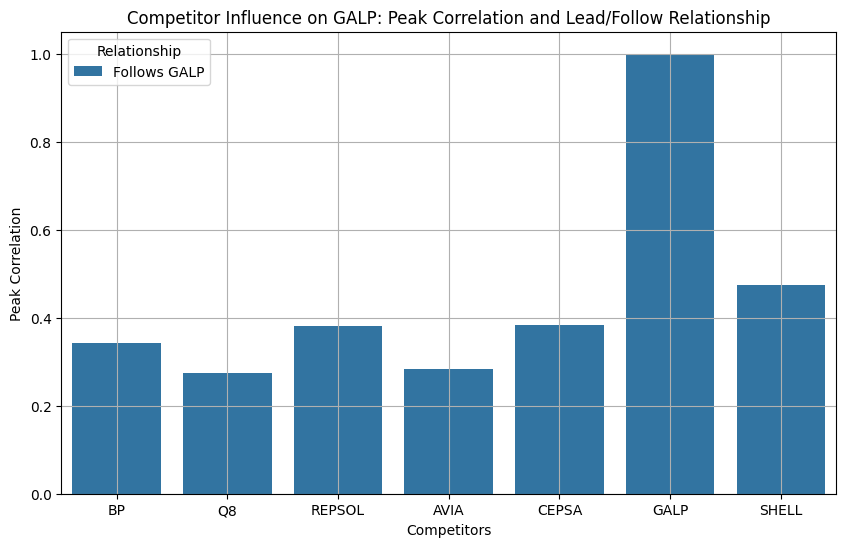

In [101]:
# Step 1: Identify peak correlation for each competitor
peak_correlations = lagged_correlation.idxmax().to_frame(name='Lag of Peak Correlation')
peak_correlation_values = lagged_correlation.max().to_frame(name='Peak Correlation')

# Combine lag and peak correlation into one DataFrame
influence_ranking = peak_correlations.join(peak_correlation_values)
influence_ranking['Lead/Follow'] = influence_ranking['Lag of Peak Correlation'].apply(
    lambda x: 'Leads GALP' if x < 0 else 'Follows GALP'
)

# Display the ranking
print(influence_ranking)

# Step 2: Visualize the influence
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(
    x=influence_ranking.index,
    y='Peak Correlation',
    hue='Lead/Follow',
    data=influence_ranking,
    dodge=False
)
plt.title('Competitor Influence on GALP: Peak Correlation and Lead/Follow Relationship')
plt.xlabel('Competitors')
plt.ylabel('Peak Correlation')
plt.legend(title='Relationship')
plt.grid(True)
plt.show()


#### Peak Correlation Magnitudes  
The magnitudes highlight the strength of the relationship between GALP and its competitors' pricing strategies. Among the competitors, CEPSA shows the strongest correlation with GALP, followed closely by REPSOL and SHELL. These high correlations suggest that these competitors closely monitor and potentially mimic GALP’s pricing behavior. BP and Q8, on the other hand, exhibit weaker correlations, indicating that their pricing strategies are somewhat independent or influenced by different factors compared to CEPSA and REPSOL. Notably, Q8 has the weakest correlation, which might indicate that it operates in a niche market or employs a pricing strategy less dependent on GALP's behavior.

#### Lag of Peak Correlation  
The lag is consistently zero across all competitors. This implies that the highest correlation occurs without delay, reflecting real-time synchronization in pricing adjustments. This could suggest a highly competitive and reactive market environment, where competitors are either responding instantly to GALP's pricing changes or simultaneously reacting to external market forces, such as fluctuations in crude oil prices or economic conditions. The absence of any lagged responses emphasizes the immediacy of pricing decisions and the strong interdependence among market players.

#### Lead/Follow Relationship  
All competitors are categorized as "Follows GALP," suggesting that GALP could play a leadership role in the market. This classification implies that competitors tend to align their pricing strategies with GALP’s movements, potentially treating GALP as a benchmark or a market leader. However, it is also possible that all competitors, including GALP, are reacting to shared external market dynamics, leading to synchronized pricing changes.

#### Conclusion  
The analysis reveals GALP's potential influence in shaping market pricing trends. The strong correlations with major competitors like CEPSA and REPSOL underscore GALP's central role in the market, while the immediate responses from all competitors reflect a highly reactive and synchronized market environment. These findings provide a strong foundation for further exploration, such as clustering competitors with similar behaviors or modeling future competitor responses to GALP's pricing strategies.


In [102]:
from sklearn.preprocessing import StandardScaler

# Assuming price_differences contains normalized price data for competitors
# Prepare a dataframe for clustering
clustering_data = price_differences.drop(['date'], axis=1)

# Normalize data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(clustering_data)

# Convert back to a DataFrame for better readability
normalized_df = pd.DataFrame(normalized_data, columns=clustering_data.columns)


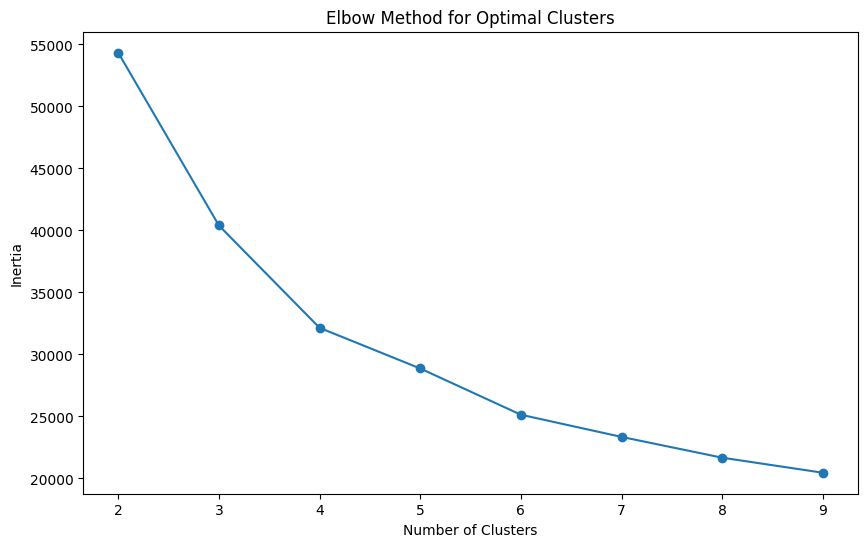

In [103]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Determine optimal clusters using the Elbow Method
inertia = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_df)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Perform K-Means with the optimal number of clusters
optimal_k = 4  # Example: Assume the optimal clusters are 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(normalized_df)

# Add cluster labels to the original DataFrame
normalized_df['Cluster'] = clusters


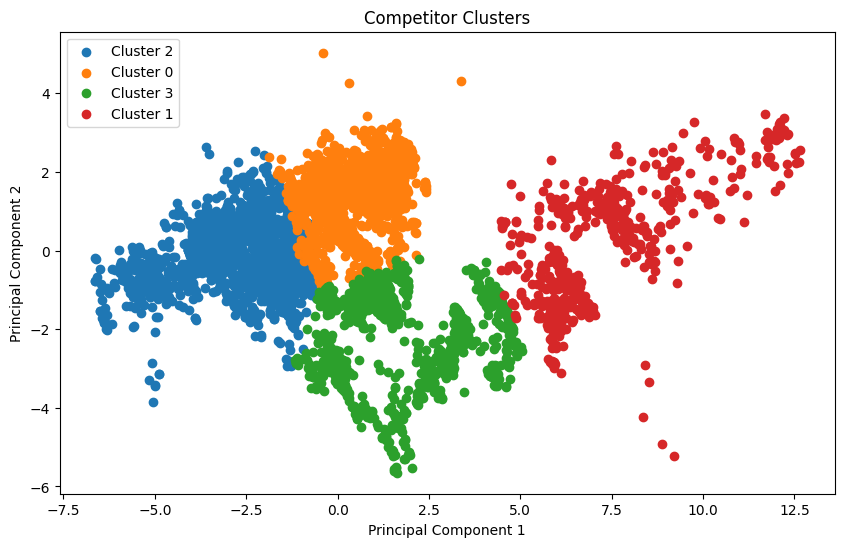

In [104]:
from sklearn.decomposition import PCA

# Perform PCA for 2D visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(normalized_df.drop('Cluster', axis=1))

# Convert to DataFrame
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster in pca_df['Cluster'].unique():
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')
    
plt.title('Competitor Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


Elbow Method for Optimal Clusters
The first plot illustrates the Elbow Method, which is a common technique used to determine the optimal number of clusters in a dataset. The x-axis represents the number of clusters, while the y-axis displays the inertia, which measures the sum of squared distances between data points and their respective cluster centroids.

The elbow point is the value of the number of clusters where adding additional clusters results in diminishing returns in terms of reducing inertia. In this plot, the elbow point appears around 4 clusters, as the rate of decrease in inertia slows significantly after this point. This suggests that dividing the dataset into four clusters is an optimal balance between simplicity and explanatory power, ensuring that the clusters represent meaningful groupings in the data without overfitting.

Competitor Clusters Visualization
The second plot visualizes the clustering results using Principal Component Analysis (PCA) to reduce the dimensionality of the data into two principal components. Each data point represents a competitor’s pricing behavior, while the color-coded clusters (Cluster 0, Cluster 1, Cluster 2, and Cluster 3) illustrate the segmentation of competitors based on their pricing characteristics.

Key observations from the plot:

Cluster 0 (Orange): This group contains a set of competitors that are distinct from the others and may exhibit moderate variation in pricing behavior. Their position on the graph suggests they might employ a balanced pricing strategy.
Cluster 1 (Red): Competitors in this cluster are relatively tightly grouped and are positioned further to the right. This indicates consistent behavior in their pricing, potentially showing a premium pricing strategy or targeting specific market segments.
Cluster 2 (Blue): This cluster spans a wide vertical range, suggesting significant variability in pricing across competitors. These competitors might cater to diverse market conditions or adapt dynamically.
Cluster 3 (Green): This group is located closer to the origin and tightly packed, suggesting that competitors in this cluster exhibit consistent and possibly competitive pricing, aiming to appeal to cost-sensitive customers.

In [106]:
# Check if 'Cluster' column exists
if 'Cluster' not in normalized_df.columns:
    raise ValueError("The 'Cluster' column does not exist. Ensure clustering has been performed.")

# Group by 'Cluster' and calculate metrics
cluster_summary = normalized_df.groupby('Cluster').agg(['mean', 'std', 'median']).reset_index()
print(cluster_summary)


brand Cluster      AVIA                            BP                      \
                   mean       std    median      mean       std    median   
0           0  0.394434  0.329819  0.423421  0.311293  0.308077  0.340841   
1           1  2.182900  0.779162  1.856954  2.267068  0.732814  1.969550   
2           2 -0.834903  0.435243 -0.747156 -0.839961  0.419583 -0.750589   
3           3  0.114198  0.563753  0.161483  0.232527  0.511309  0.220528   

brand     CEPSA                      ... GALP_vs_CEPSA GALP_vs_AVIA            \
           mean       std    median  ...        median         mean       std   
0      0.306992  0.305029  0.337088  ...      0.457221    -0.494131  0.642074   
1      2.270496  0.732198  1.975452  ...     -1.974874     1.186724  1.136008   
2     -0.838323  0.421457 -0.744161  ...      0.569368    -0.220478  0.678689   
3      0.234678  0.513581  0.215585  ...     -1.000973     0.793987  1.123950   

brand           GALP_vs_Q8                        

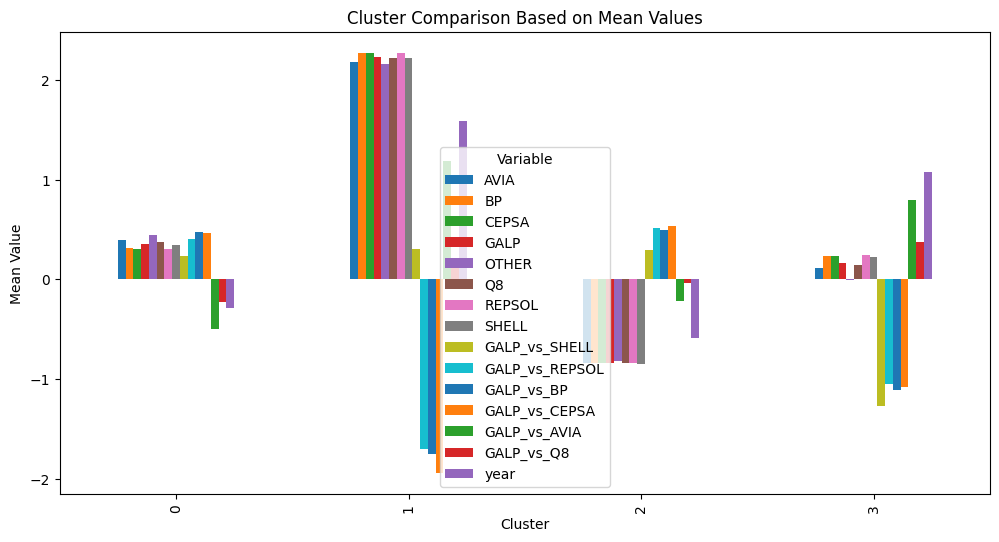

In [108]:
cluster_means = cluster_summary.xs('mean', level=1, axis=1)
cluster_means.plot(kind='bar', figsize=(12, 6))
plt.title("Cluster Comparison Based on Mean Values")
plt.ylabel("Mean Value")
plt.xlabel("Cluster")
plt.legend(title="Variable")
plt.show()


The clustering analysis we conducted provides a deeper understanding of how different competitors or variables behave in relation to each other. Let's break this down for someone new to the concept.

Bar Plot Analysis: Cluster Comparison Based on Mean Values
This bar chart visualizes the mean values of various variables for each identified cluster. Each cluster represents a group of competitors or data points with similar characteristics. For instance:

Cluster 1 shows significantly higher mean values across almost all variables compared to the other clusters. This indicates that the entities in this cluster may represent a dominant pricing behavior or a distinct pattern compared to others.
Cluster 2 has a mix of positive and negative mean values, suggesting variability in behavior. Some variables are strong, while others show weaker or even inverse trends.
Cluster 3 has mostly lower or negative mean values, which could imply a group of competitors that consistently underperform or adopt different strategies.
Cluster 0, in contrast, shows moderate values, indicating a more balanced or neutral behavior.
This chart essentially tells us how each cluster behaves on average for the analyzed variables, allowing us to understand their pricing strategies, competitiveness, and potential market positioning.

Scatter Plot: Competitor Clusters in Principal Component Space
The scatter plot represents the data points (competitors or observations) distributed across two dimensions—Principal Component 1 (PC1) and Principal Component 2 (PC2). These principal components are derived from a dimensionality reduction technique that summarizes the most important features in the data while reducing its complexity.

Each color in the plot corresponds to a different cluster:

Red (Cluster 1) represents a tightly packed group with unique characteristics. This group is distinctly separate from the others, indicating that its behavior is quite different from the rest.
Green (Cluster 3) shows some overlap with blue and orange clusters but remains a relatively cohesive group, indicating shared traits.
Orange (Cluster 0) and Blue (Cluster 2) show some spread, implying more variability among the members of these clusters.
This visualization helps identify distinct groups and their relative similarity or difference. For example, the separation between red and green clusters implies distinct strategies or market behaviors, whereas the overlap between orange and blue might suggest some commonality in their patterns.

Explanation for Someone New to Clustering
Imagine we’re trying to group similar items in a grocery store. Some items might belong to the same aisle because they’re alike—for example, fruits like apples, bananas, and oranges. But within the same aisle, we might find slight differences, like tropical fruits grouped separately. Clustering in data analysis works similarly. We group competitors or observations that behave similarly, but instead of taste or type, we use numbers and patterns in data (like prices or trends) to create these groups.

In this case, we are grouping competitors based on their pricing behavior and relationships to GALP and other variables. The bar chart tells us the average behavior of each group, while the scatter plot shows how close or far these groups are in terms of their overall patterns.

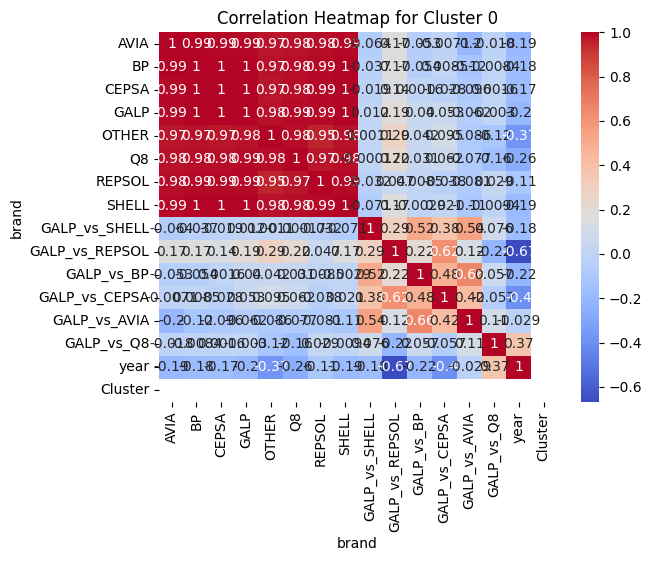

In [109]:
# Filter data for a specific cluster and compute correlations
cluster_0_data = normalized_df[normalized_df['Cluster'] == 0]
cluster_0_corr = cluster_0_data.corr()

# Plot heatmap
sns.heatmap(cluster_0_corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap for Cluster 0")
plt.show()
